<a href="https://colab.research.google.com/github/PoulamiDasDA/Santander_Customer_Satisfaction_Kaggle/blob/master/CLL_Prob_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing library to upload files
#from google.colab import files

upload the data files

In [2]:
# Uploading the files
#upload = files.upload()

In [3]:
# Unzip the data
#!unzip santander-customer-satisfaction.zip

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Read the data

In [5]:
traindata=pd.read_csv('train.csv')
testdata=pd.read_csv('test.csv')

Understanding the data

In [6]:
traindata.head(10)

ID  var3  var15  ...  saldo_medio_var44_ult3          var38  TARGET
0   1     2     23  ...                     0.0   39205.170000       0
1   3     2     34  ...                     0.0   49278.030000       0
2   4     2     23  ...                     0.0   67333.770000       0
3   8     2     37  ...                     0.0   64007.970000       0
4  10     2     39  ...                     0.0  117310.979016       0
5  13     2     23  ...                     0.0   87975.750000       0
6  14     2     27  ...                     0.0   94956.660000       0
7  18     2     26  ...                     0.0  251638.950000       0
8  20     2     45  ...                     0.0  101962.020000       0
9  23     2     25  ...                     0.0  356463.060000       0

[10 rows x 371 columns]

Get shape of the data

In [7]:
traindata.shape

(76020, 371)

In [8]:
testdata.shape

(75818, 370)

Get a summary on the data type of all the columns

In [9]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [10]:
traindata.dtypes

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object

Checking the missing values in the data

In [11]:
missingvalueDf=pd.DataFrame(traindata.isnull().sum(), columns= ['Number of missing values'])
missingvalueDf[missingvalueDf['Number of missing values']>0]

Empty DataFrame
Columns: [Number of missing values]
Index: []

It can be seen that there is no missing value in data

Check for presence of 0s in the data

In [12]:
zerovaluecolumnlist=[]
for feature in traindata.columns:
  zerocount=(traindata[feature]==0).sum()
  if zerocount>0:
    print('Number of zeroes in column ' + feature + ' is ' + str(zerocount))
    if(zerocount==76020):
      print('the column ' + feature + ' contains only zero values')
      zerovaluecolumnlist.append(feature)
  else:
    print('column ' + feature + ' does not have any zeroes')

print(zerovaluecolumnlist)

column ID does not have any zeroes
Number of zeroes in column var3 is 75
column var15 does not have any zeroes
Number of zeroes in column imp_ent_var16_ult1 is 72301
Number of zeroes in column imp_op_var39_comer_ult1 is 66075
Number of zeroes in column imp_op_var39_comer_ult3 is 64330
Number of zeroes in column imp_op_var40_comer_ult1 is 75725
Number of zeroes in column imp_op_var40_comer_ult3 is 75672
Number of zeroes in column imp_op_var40_efect_ult1 is 75982
Number of zeroes in column imp_op_var40_efect_ult3 is 75975
Number of zeroes in column imp_op_var40_ult1 is 75791
Number of zeroes in column imp_op_var41_comer_ult1 is 66226
Number of zeroes in column imp_op_var41_comer_ult3 is 64480
Number of zeroes in column imp_op_var41_efect_ult1 is 69336
Number of zeroes in column imp_op_var41_efect_ult3 is 67372
Number of zeroes in column imp_op_var41_ult1 is 64388
Number of zeroes in column imp_op_var39_efect_ult1 is 69325
Number of zeroes in column imp_op_var39_efect_ult3 is 67360
Number

It can be seen that there are certain column which contain only 0s,so this column does not have any variablity, and can be removed in further analysis and there are certain columns for which majority of data is 0, for which the concentration of other values need to be checked


Lets also verify if test data set also has 0s for these columns if it is then we can ignore those columns

In [13]:
zerovaluecolumnlistintest=[]
for feature in testdata.columns:
  zerocount=(testdata[feature]==0).sum()
  if zerocount>0:
    if(zerocount==75818):
      zerovaluecolumnlistintest.append(feature)
print(zerovaluecolumnlistintest)

['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3', 'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_out_1y3', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var17_hace3', 'imp_reemb_var33_hace3', 'imp_reemb_var33_ult1', 'imp_trasp_var17_out_hace3', 'imp_trasp_var17_out_ult1', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var17_hace3', 'num_reemb_var33_hace3', 'num_reemb_var33_ult1', 'num_trasp_var17_out_hace3', 'num_trasp_var17_out_ult1', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3', 'saldo_medio_var29_hace3']


In [14]:
set(zerovaluecolumnlist)-set(zerovaluecolumnlistintest)

set()

so it seems these columns do not have any data except 0 in both train and test data set, so they can be ignored
Next removing those columns from test and train data

In [15]:
traindataNew=traindata[[col for col in traindata.columns if not (col in zerovaluecolumnlist)]]
traindataNew.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=337)

In [16]:
testdataNew=testdata[[col for col in testdata.columns if not (col in zerovaluecolumnlist)]]

target variable distribution

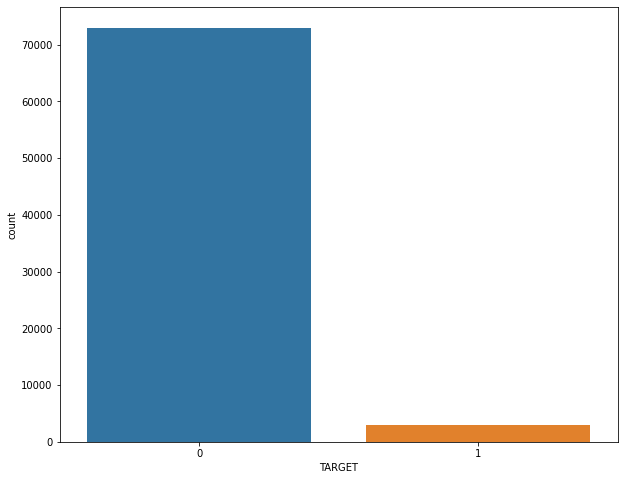

In [17]:
plt.figure(figsize = (10, 8))
sns.countplot(x = 'TARGET', data = traindataNew)

In [18]:
print("No of customers who are not satisfied in train data set " + str(len(traindataNew[traindataNew['TARGET'] == 1])) 
+ "\nPercentage of not satisfied customers in train data set " + str(round((len(traindataNew[traindataNew['TARGET'] == 1])/len(traindataNew))*100,2)))
print("No of customers who are satisfied in train data set " + str(len(traindataNew[traindataNew['TARGET'] == 0])) 
+ "\nPercentage of satisfied customers in train data set " + str(round((len(traindataNew[traindataNew['TARGET'] == 0])/len(traindataNew))*100,2)))

#print('No of customers who are not satisfied in test data set' + str(len(testdataNew[testdataNew['TARGET'] == 1])) 
#+ "\nPercentage of not satisfied customers in test data set " + str(round((len(testdataNew[testdataNew['TARGET'] == 1])/len(testdataNew))*100,2)))
#print('No of customers who are satisfied in test data set' + str(len(testdataNew[testdataNew['TARGET'] == 0])) 
#+ "\nPercentage of satisfied customers in test data set " + str(round((len(testdataNew[testdataNew['TARGET'] == 0])/len(testdataNew))*100,2)))

No of customers who are not satisfied in train data set 3008
Percentage of not satisfied customers in train data set 3.96
No of customers who are satisfied in train data set 73012
Percentage of satisfied customers in train data set 96.04


Lets look at the correlation between all variables, based on that we will look into individual variables for deeper analysis


First lets break the whole dataset into small datasets with fewer columns to understand the corelatio  among the independent variables

In [19]:
datadict={}
columnSet=traindataNew.columns
noOfcolumn=len(columnSet)

In [20]:
i=0
while(i<=noOfcolumn):
  f=i+30
  if(f>noOfcolumn):
    f=noOfcolumn
  datadict["traindataNew{0}".format(i)] = traindataNew[columnSet[i:f]]
  i=i+30  

In [21]:
datadict.keys()

dict_keys(['traindataNew0', 'traindataNew30', 'traindataNew60', 'traindataNew90', 'traindataNew120', 'traindataNew150', 'traindataNew180', 'traindataNew210', 'traindataNew240', 'traindataNew270', 'traindataNew300', 'traindataNew330'])

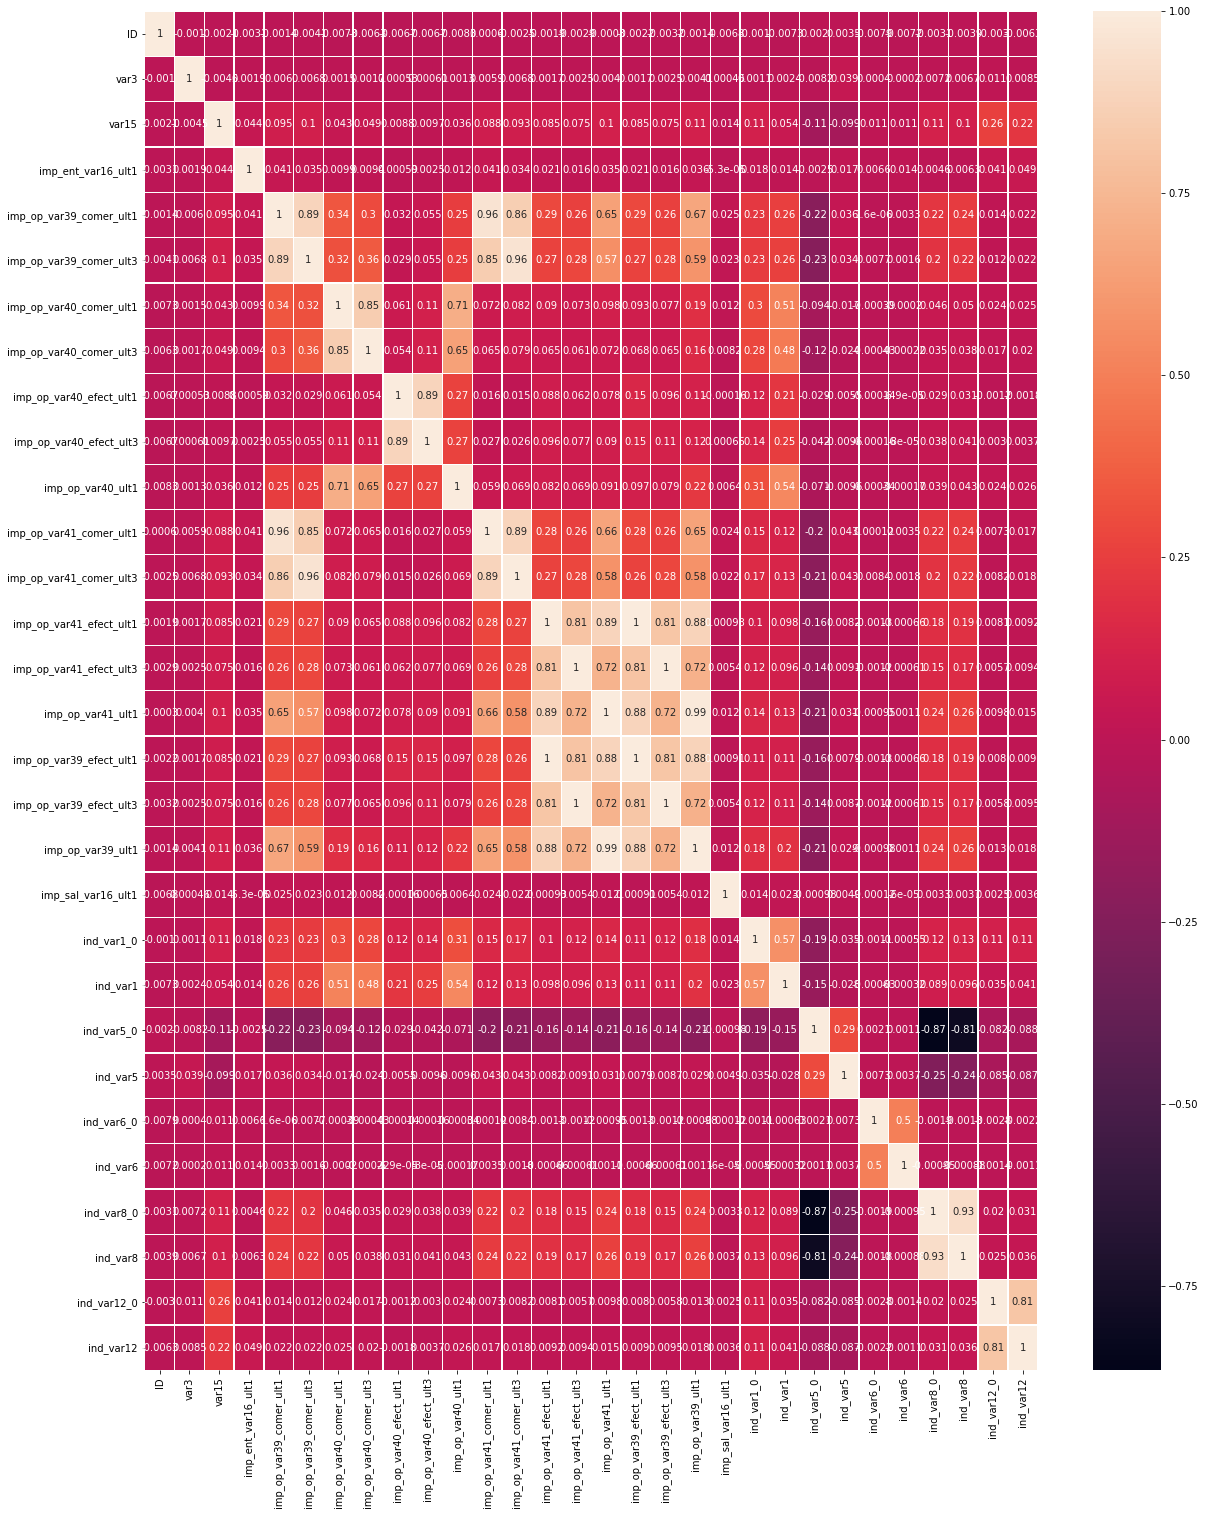

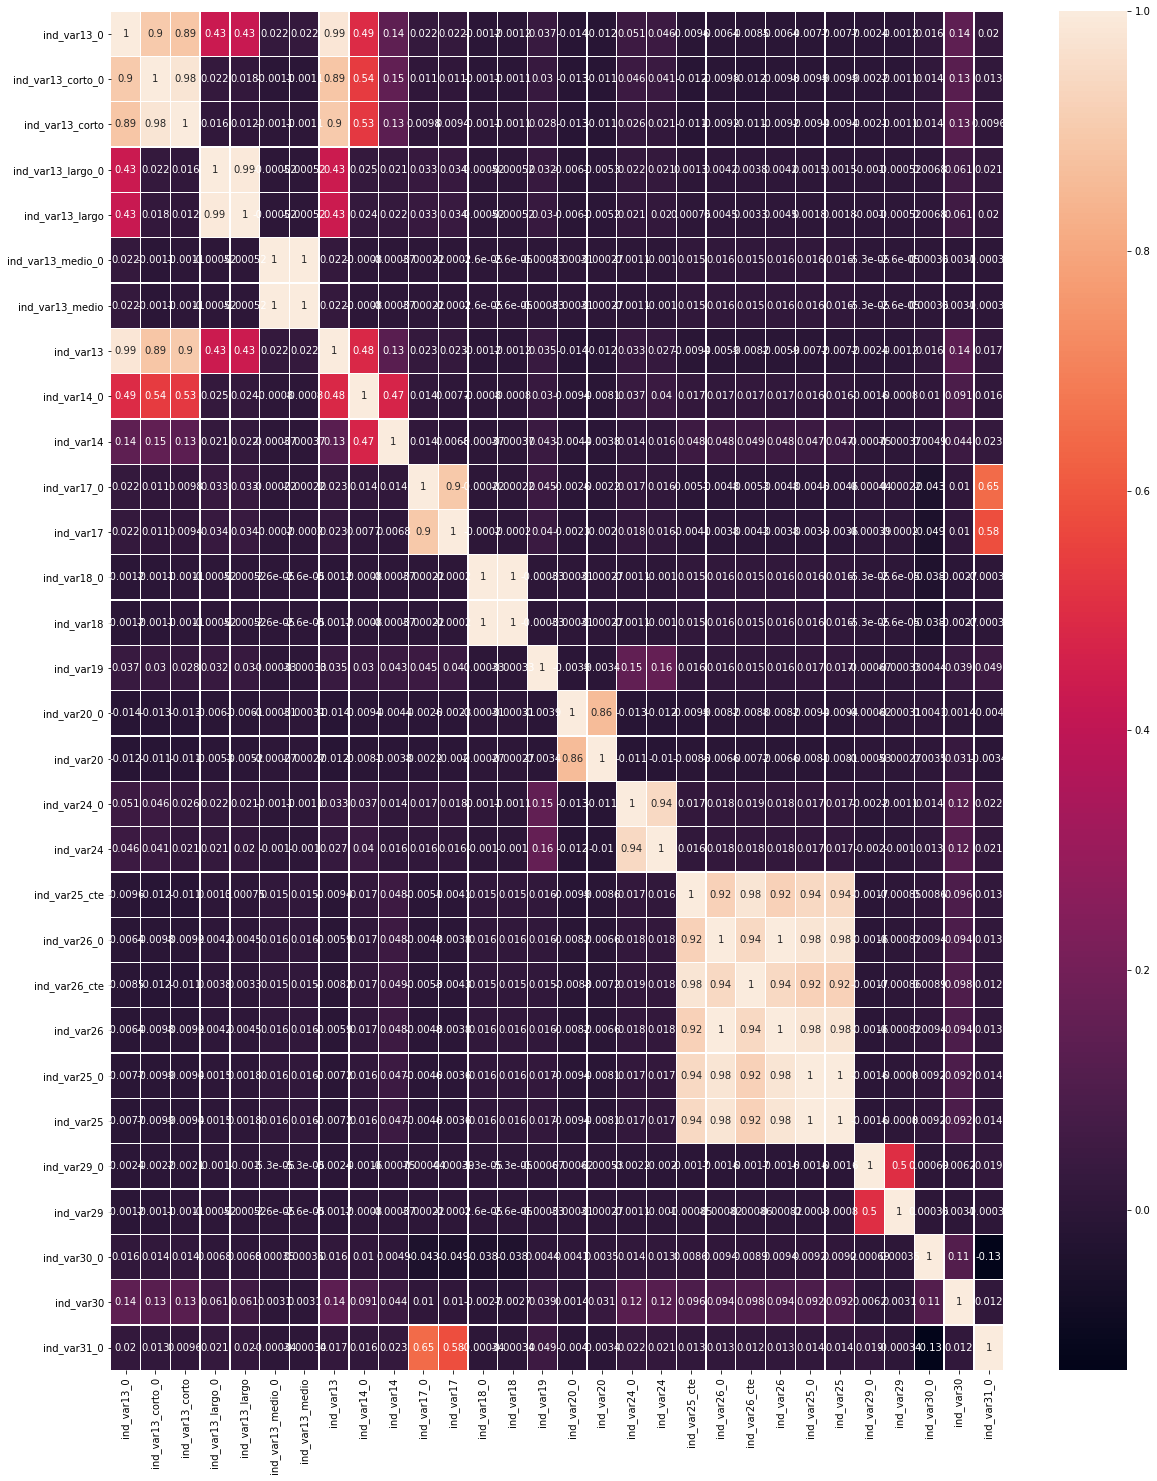

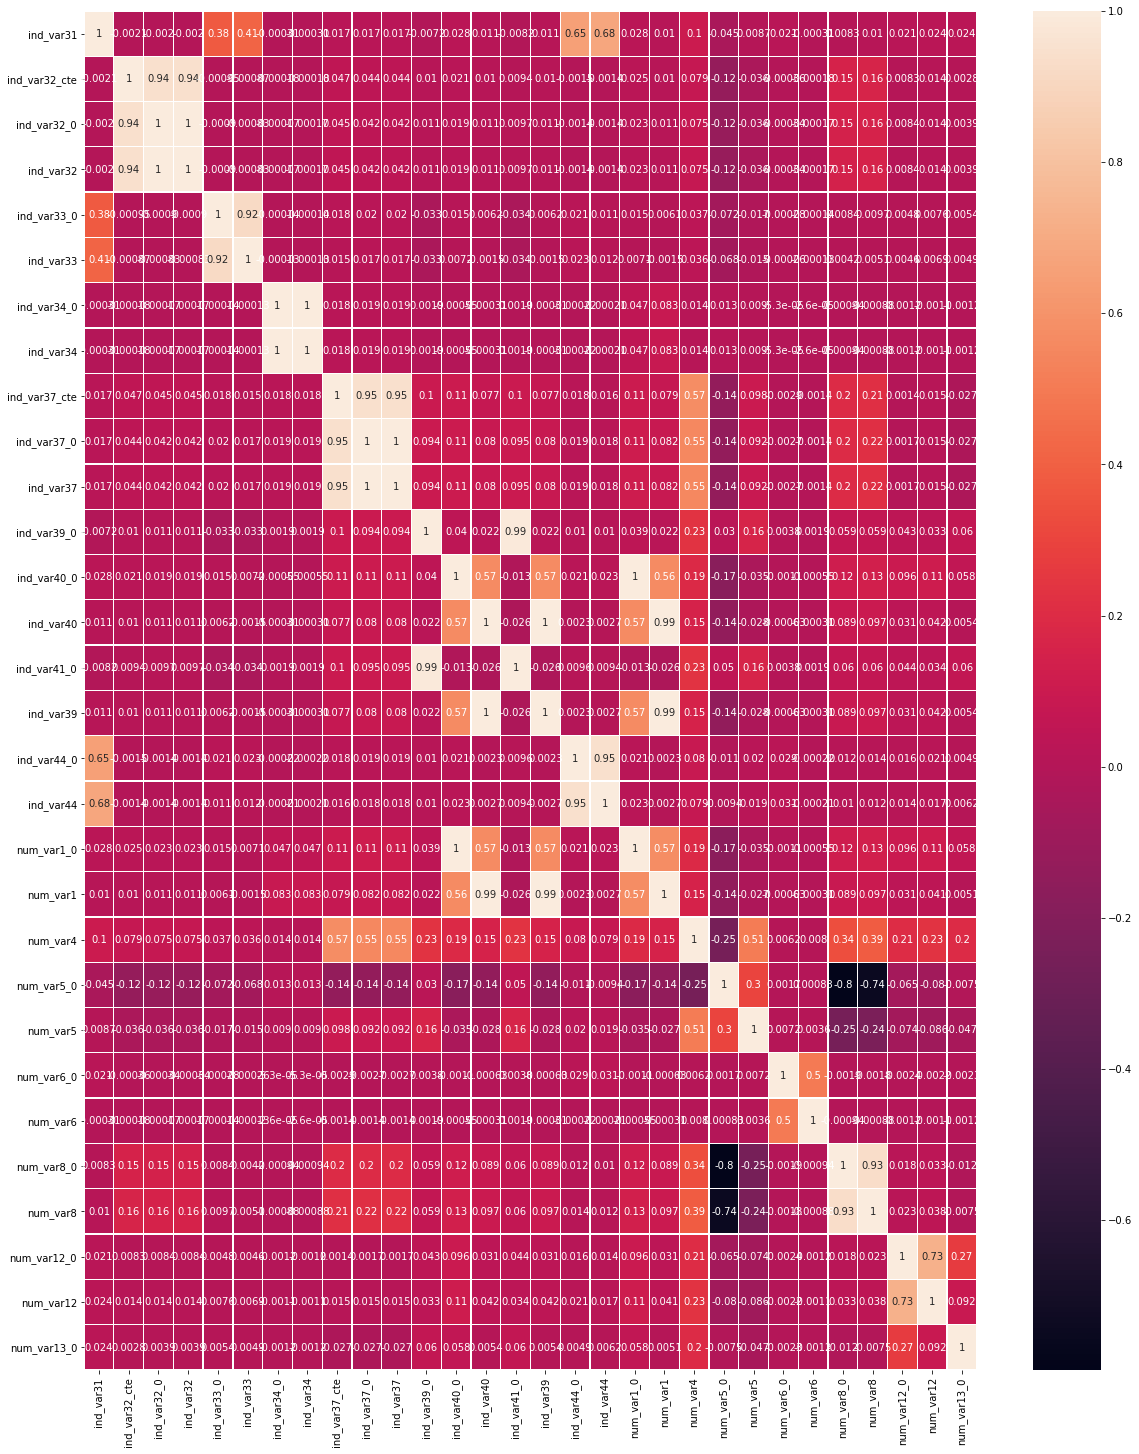

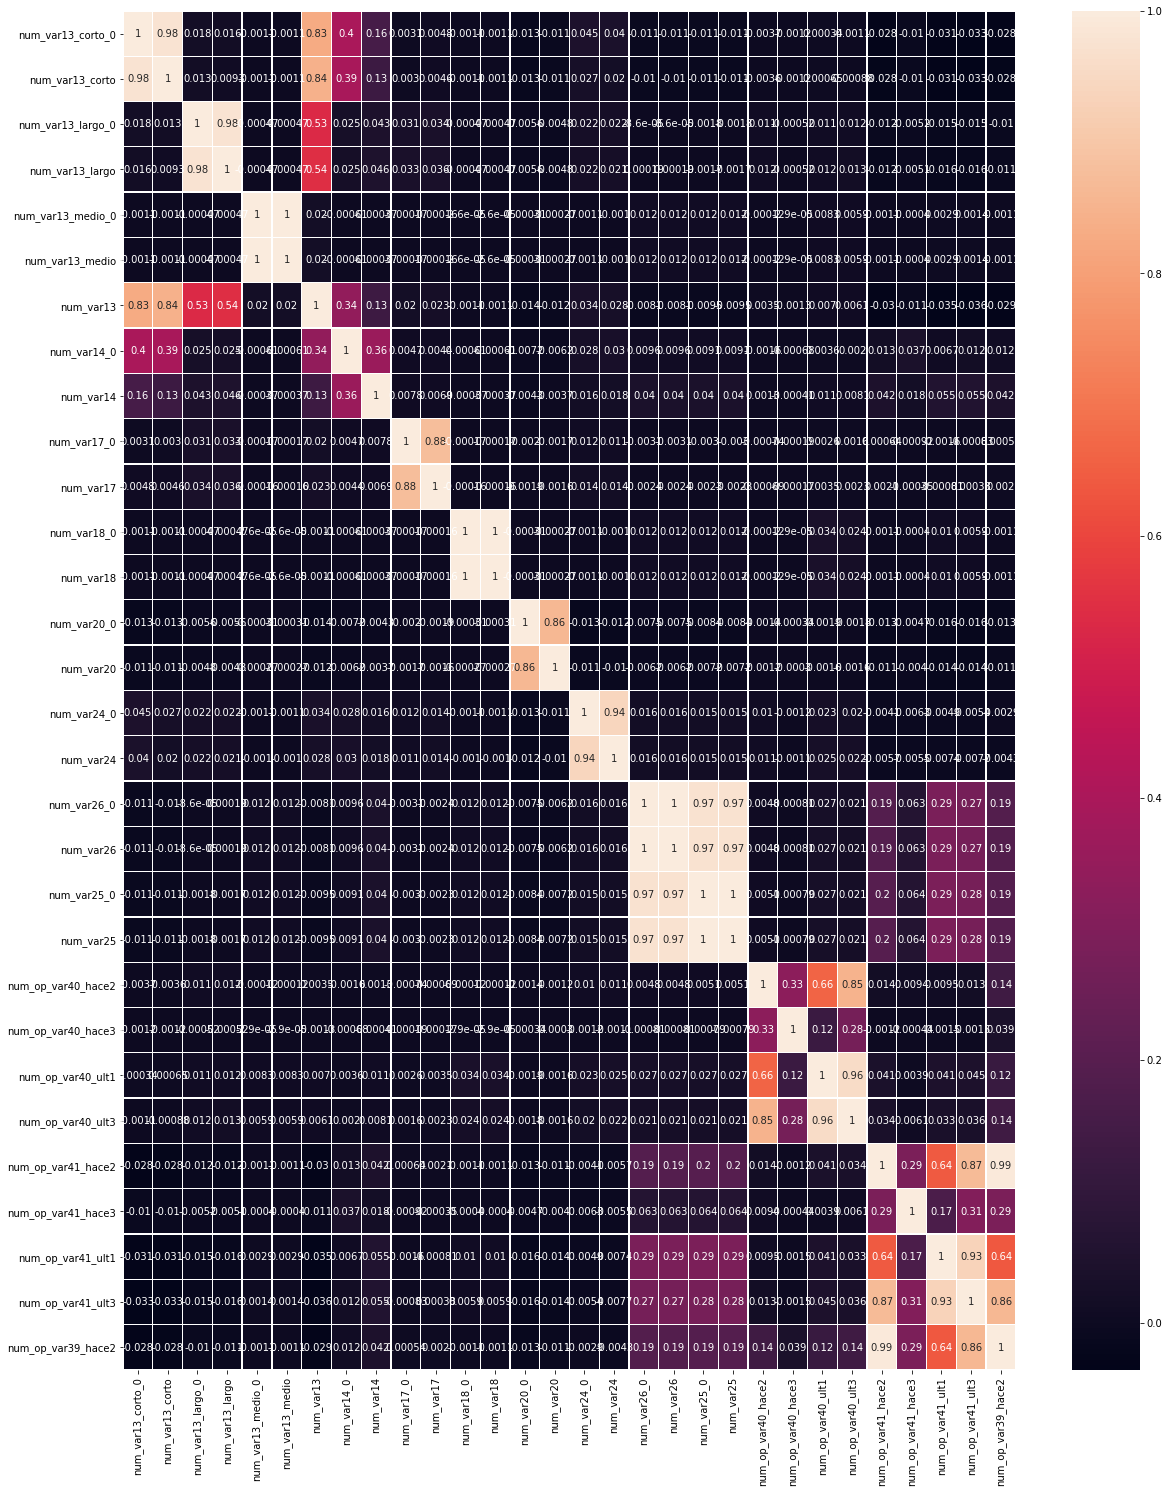

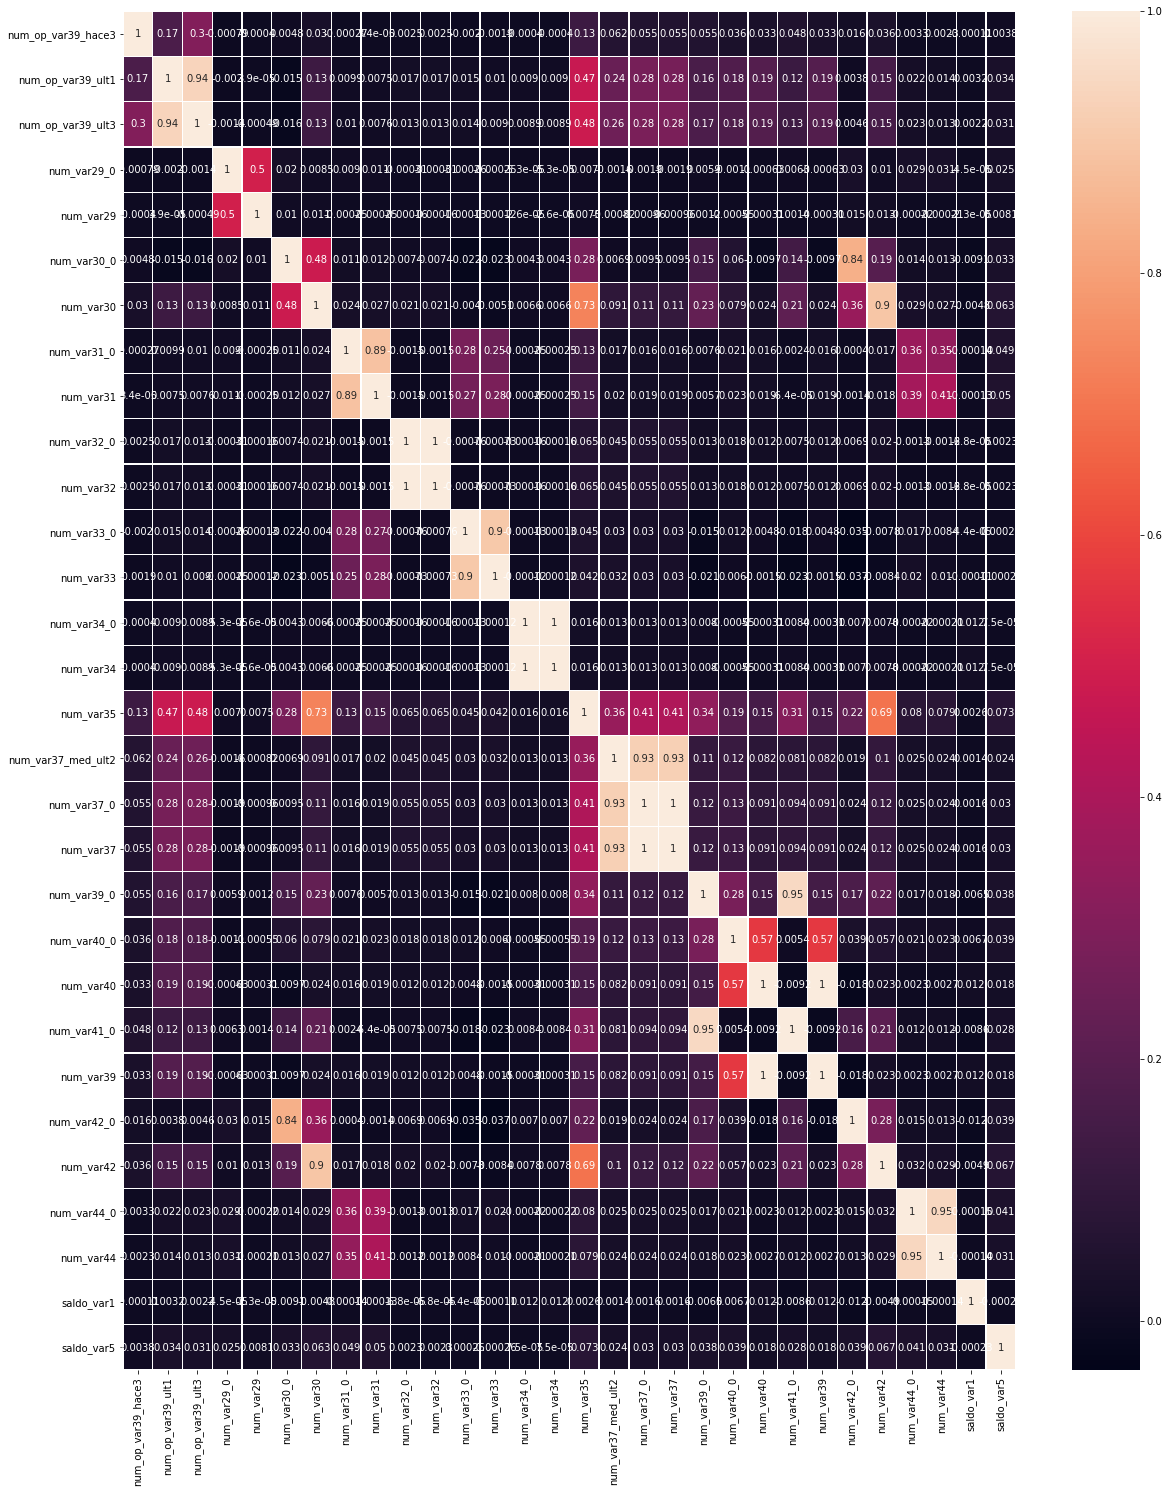

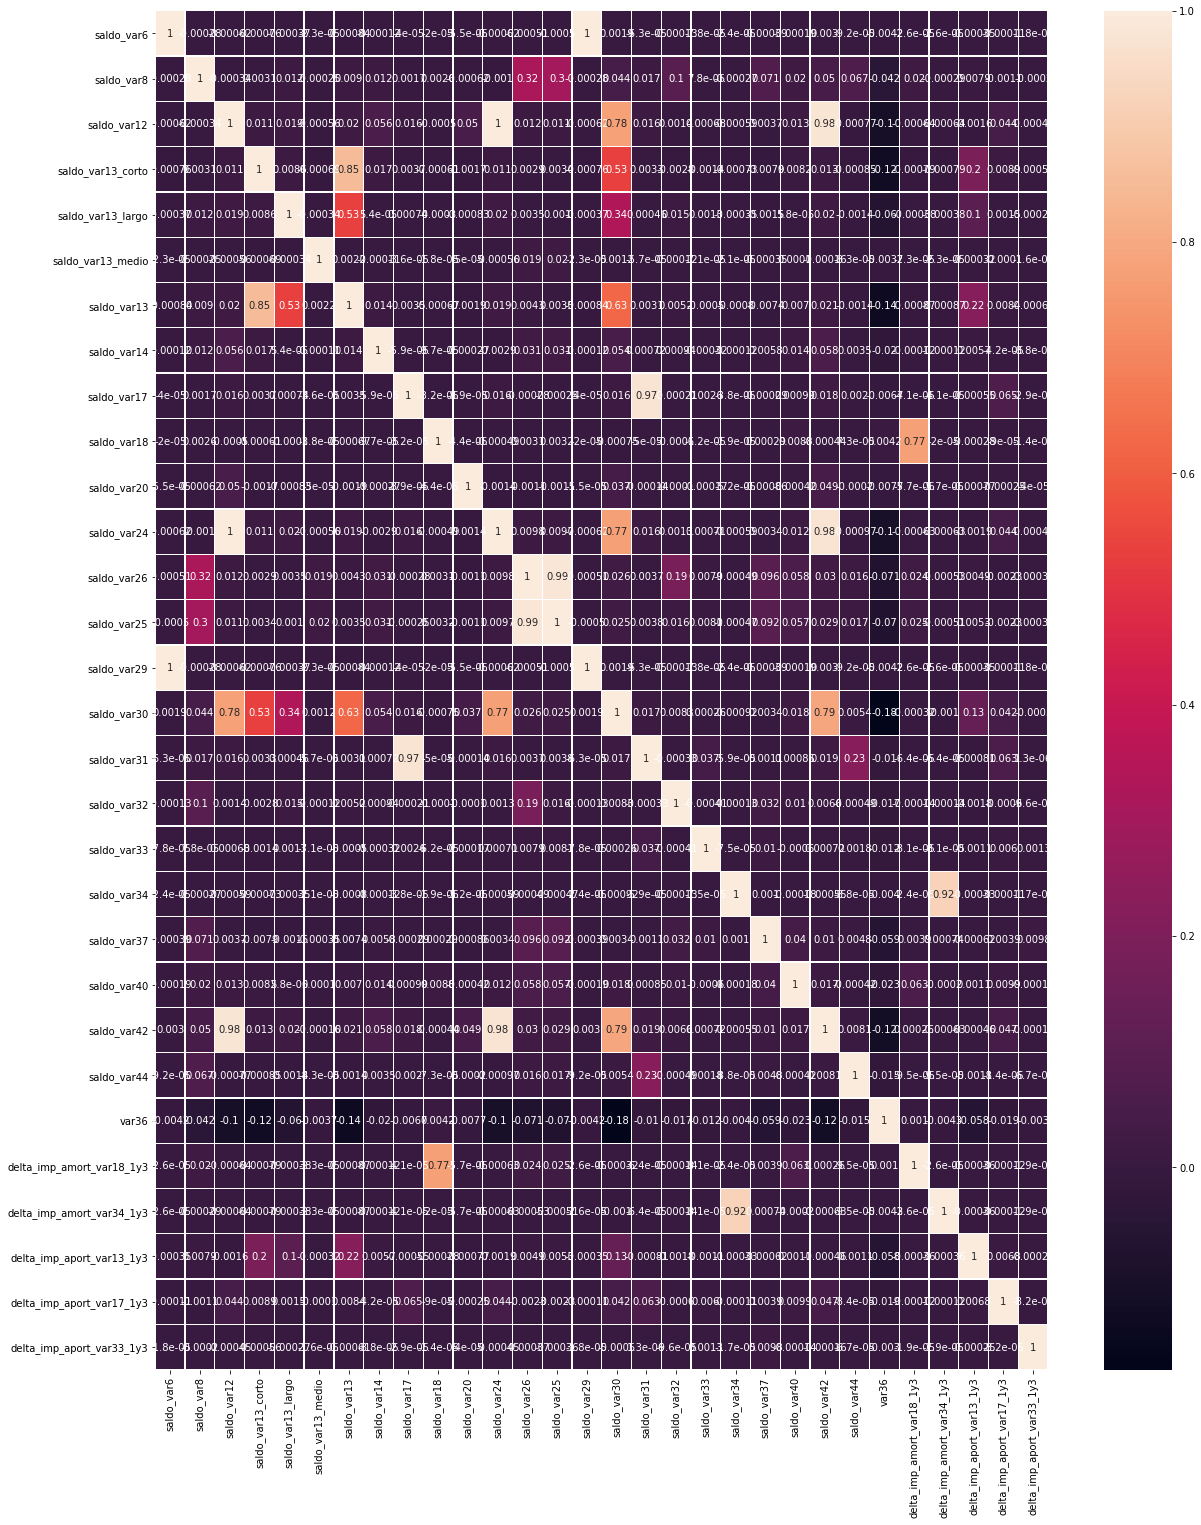

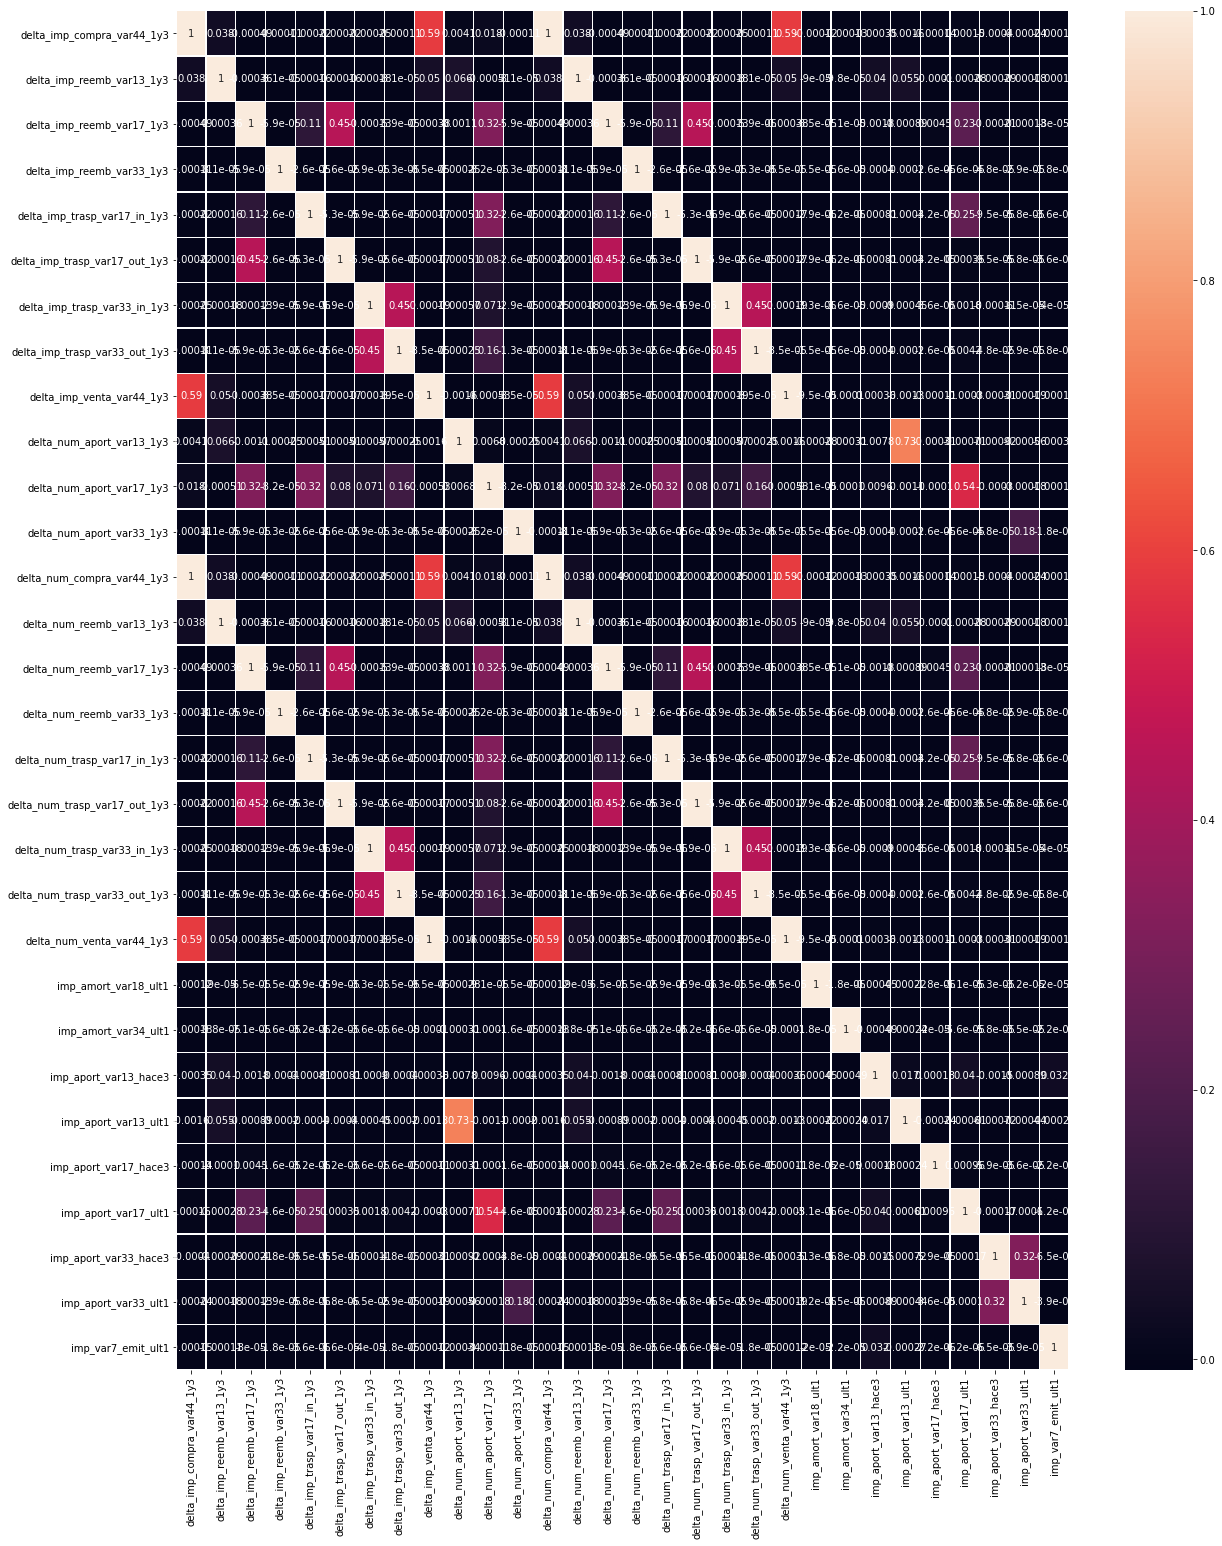

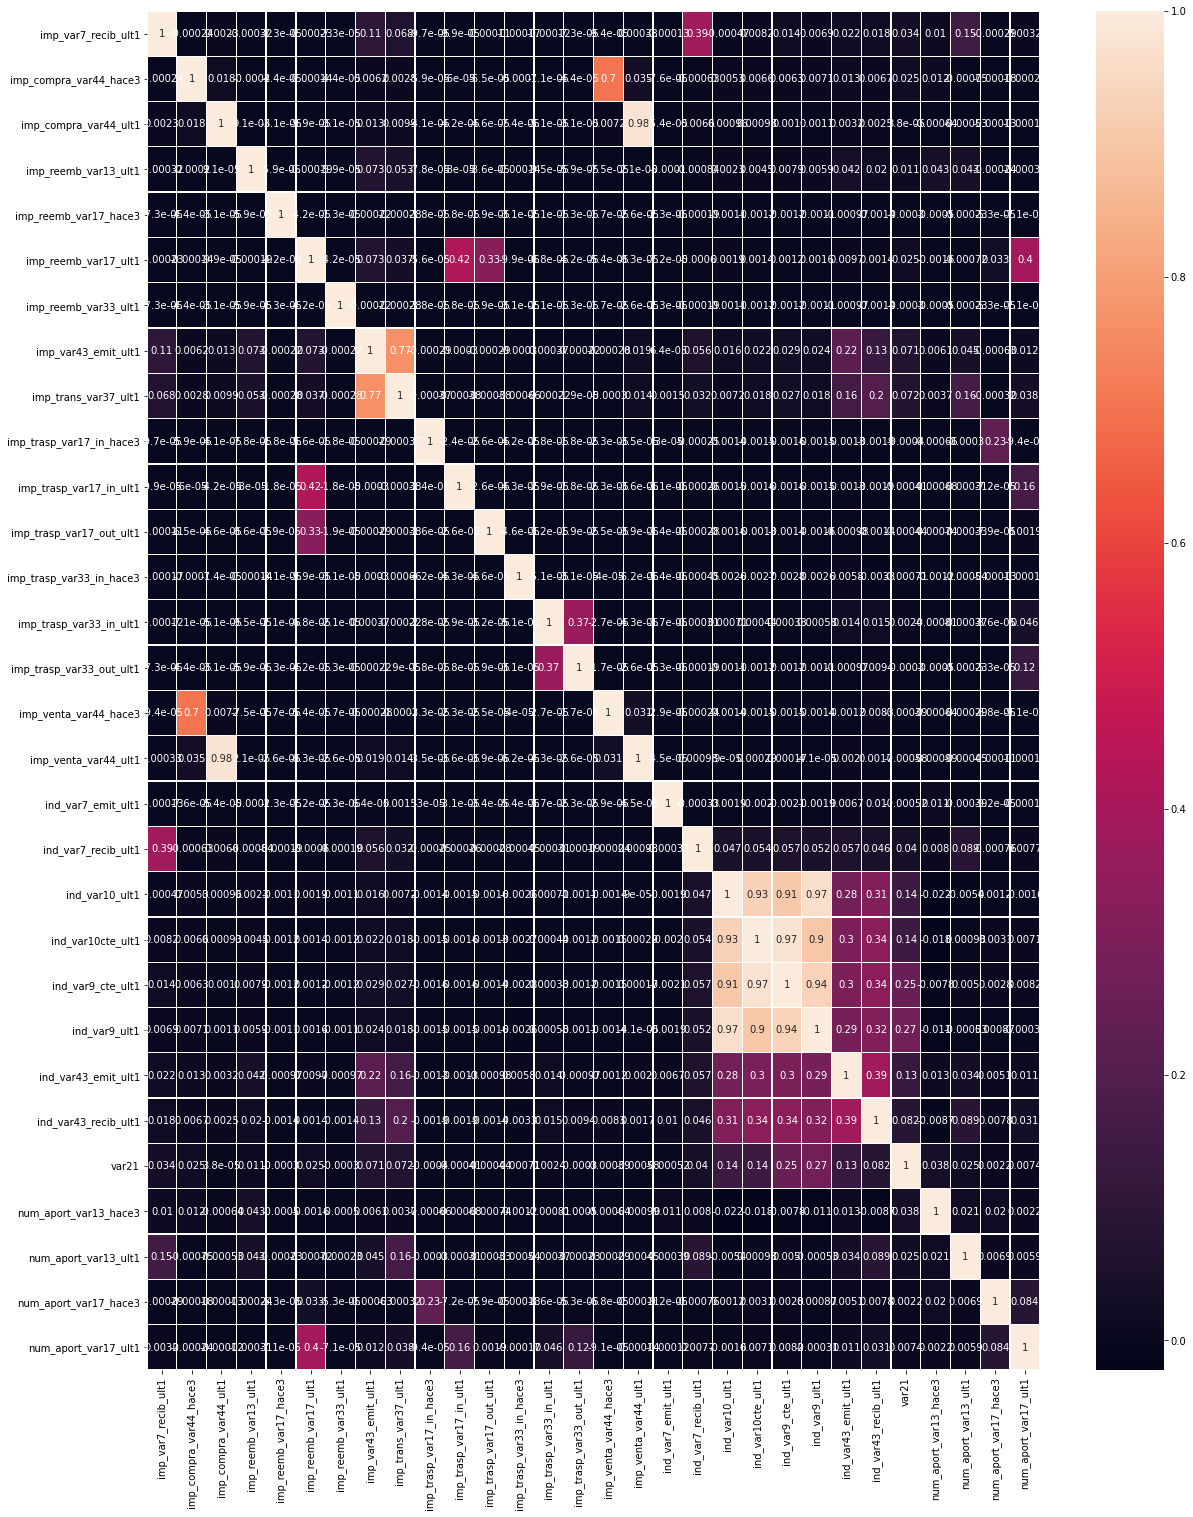

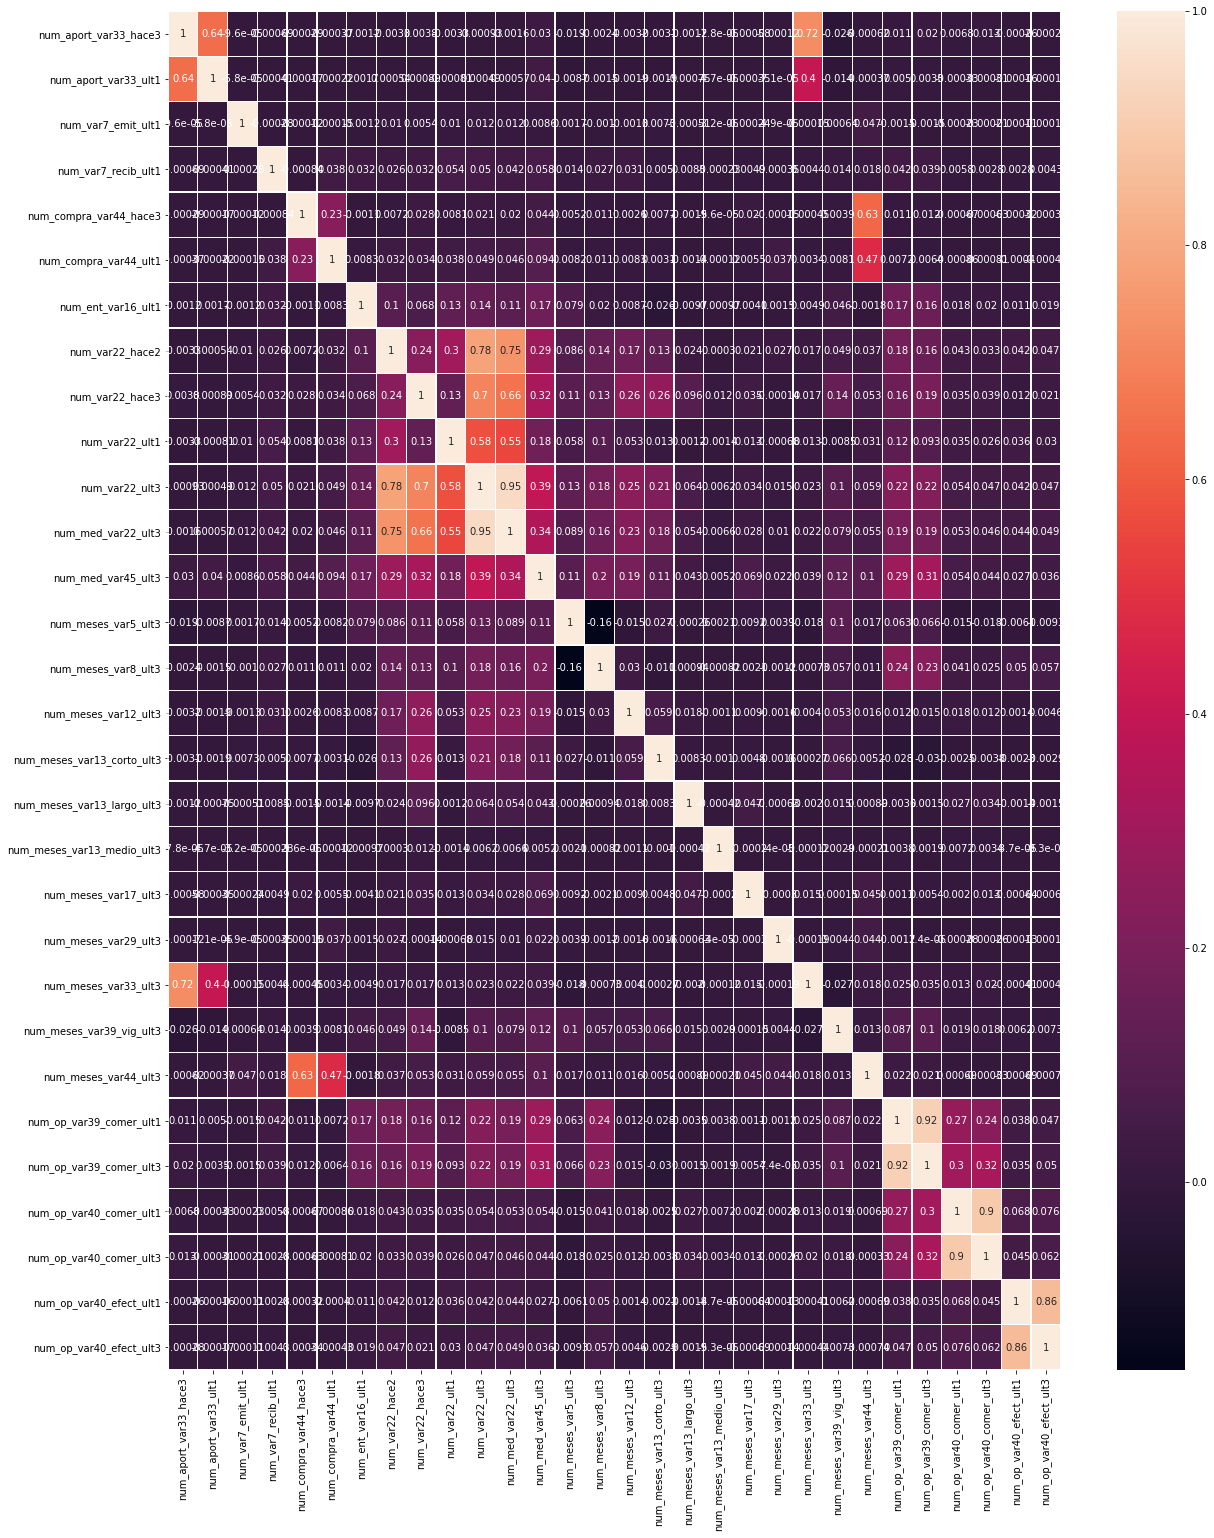

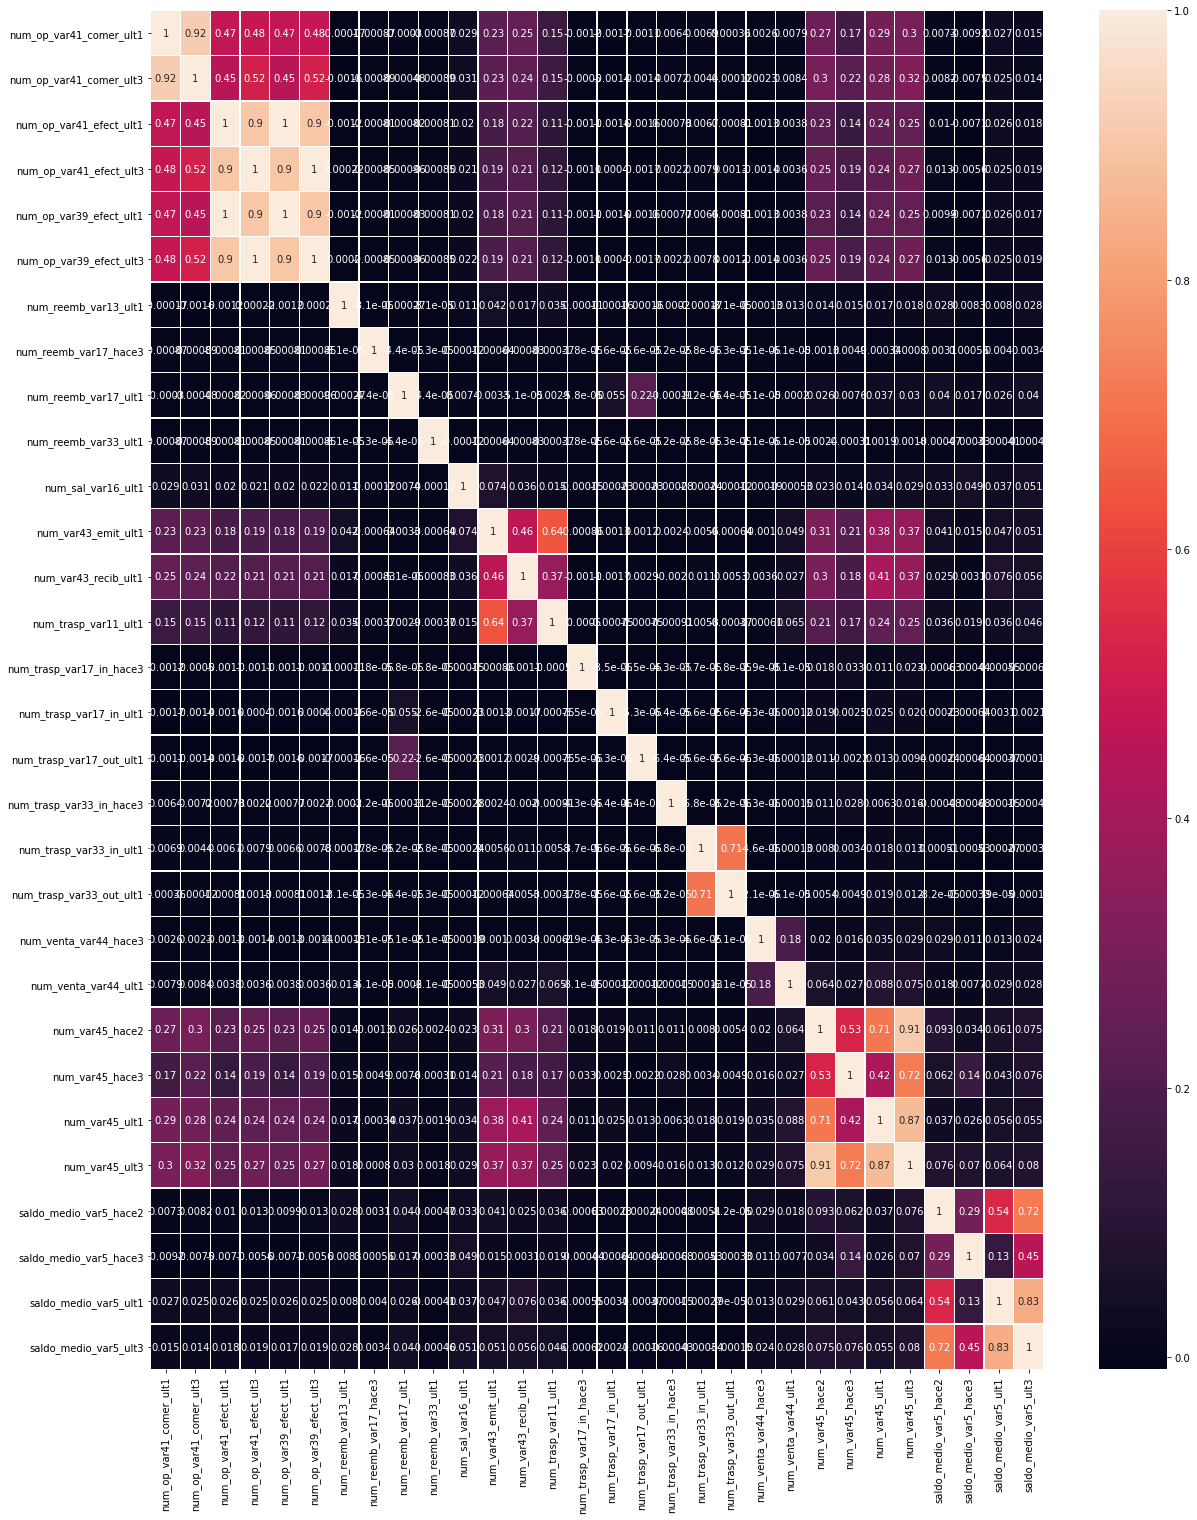

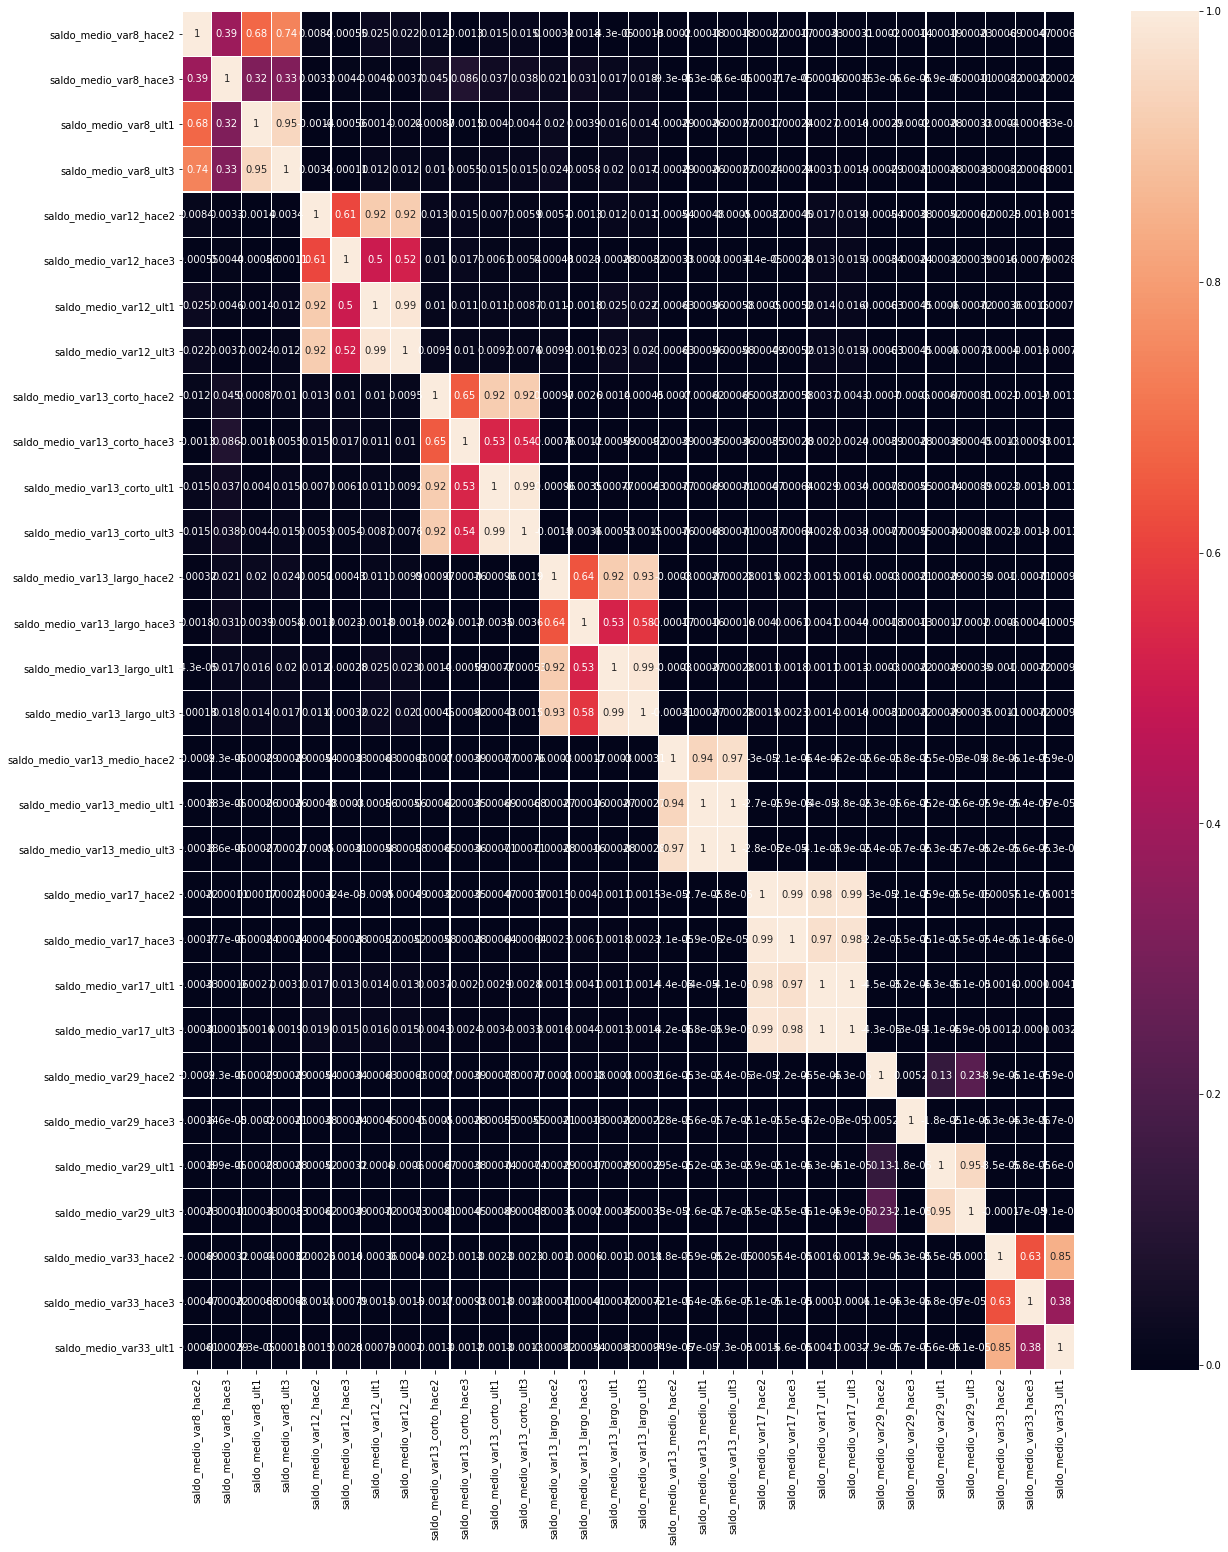

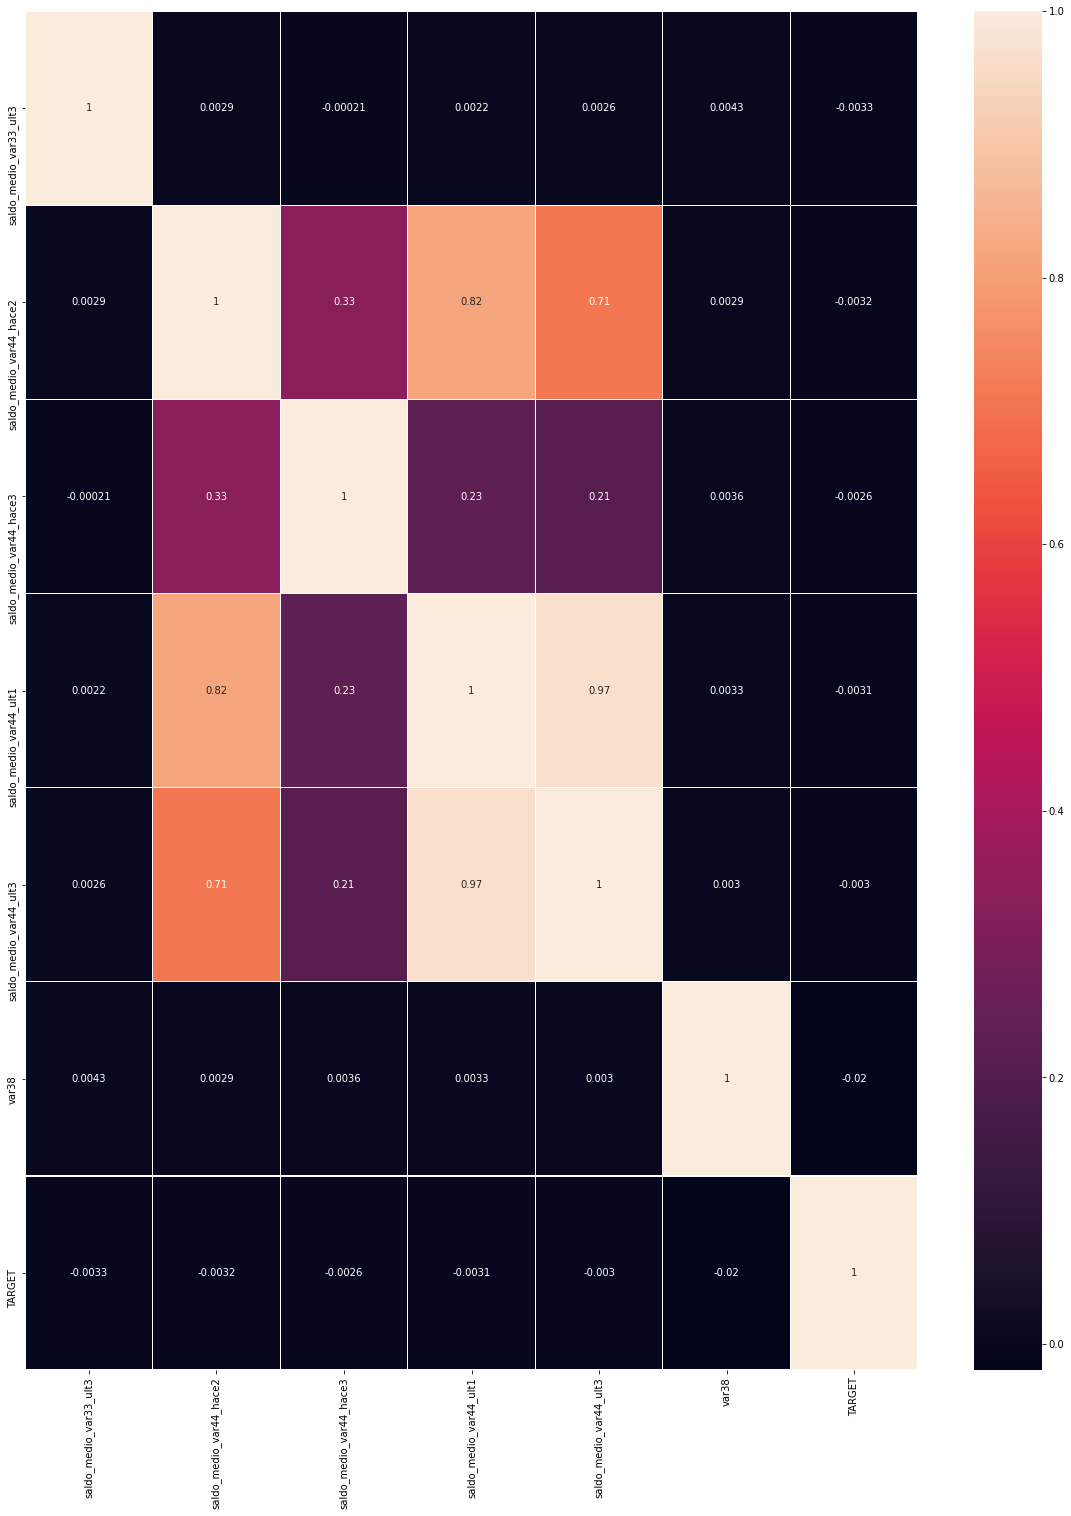

In [22]:
for key in datadict:
  plt.figure(figsize = (20,25))
  sns.heatmap(datadict[key].corr(), annot=True, linewidths=.3)

looking at the heatmap and the correlation values it can be seen that there are several independent variables that have high correlation with each other, so instead of selecting all of those columns only one of those column can be considered. 
if its a positive correlation then it should be less than 0.5
and if its a negative correlation then it should be less than -0.5

In [23]:
corrMatrix=traindataNew.corr()
columns = np.full((corrMatrix.shape[0],), True, dtype=bool)
for i in range(corrMatrix.shape[0]):
    for j in range(i+1, corrMatrix.shape[0]):
      if abs(corrMatrix.iloc[i,j])>0.5:
        if columns[j]:
          columns[j] = False

In [24]:
selected_columns = traindataNew.columns[columns]

In [25]:
traindataaftercorr=traindataNew[selected_columns]

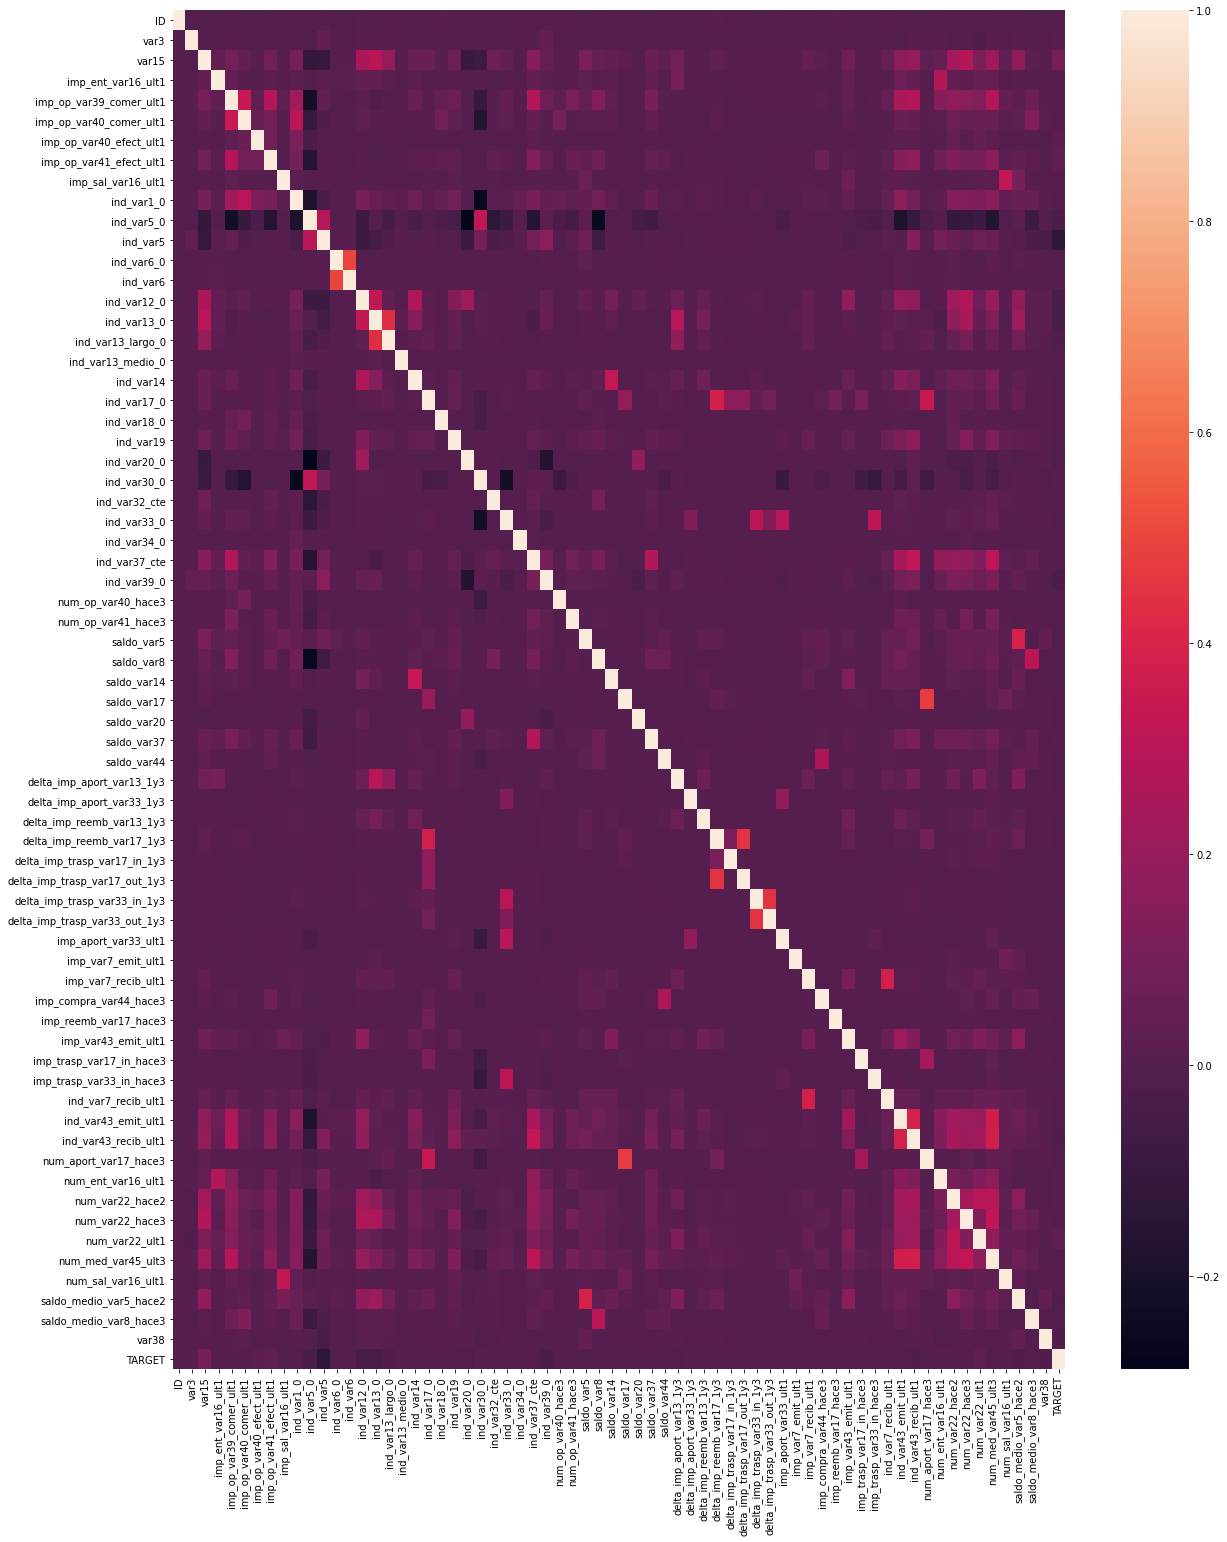

In [26]:
plt.figure(figsize = (20,25))
sns.heatmap(traindataaftercorr.corr())

So looking at the updated heat map with the new set of columns it seem all those independent variables are removed that had high correlation among themselves, now lets look at the correlation between target columns and independent variables

In [27]:
pd.set_option('max_rows',100)

In [28]:
traindataaftercorr.corr().T

ID      var3  ...     var38    TARGET
ID                             1.000000 -0.001025  ... -0.005687  0.003148
var3                          -0.001025  1.000000  ...  0.000071  0.004475
var15                         -0.002135 -0.004452  ...  0.006497  0.101322
imp_ent_var16_ult1            -0.003111  0.001868  ...  0.000007 -0.000017
imp_op_var39_comer_ult1       -0.001436  0.005989  ...  0.012546  0.010353
imp_op_var40_comer_ult1       -0.007277  0.001518  ...  0.016628  0.003119
imp_op_var40_efect_ult1       -0.006700  0.000530  ... -0.000315  0.019221
imp_op_var41_efect_ult1       -0.001869  0.001676  ...  0.001859  0.029479
imp_sal_var16_ult1            -0.006793  0.000460  ...  0.003382  0.000509
ind_var1_0                    -0.001022  0.001069  ...  0.011356  0.001608
ind_var5_0                     0.002002 -0.008234  ... -0.005977 -0.032888
ind_var5                       0.003493  0.038505  ... -0.038960 -0.135349
ind_var6_0                    -0.007909  0.000401  ... -0.001552 -0.002082
ind_var6                      -0.007154  0.000200  ... -0.001676 -0.001041
ind_var12_0                   -0.002967  0.010520  ...  0.014147 -0.038215
ind_var13_0                    0.000466  0.009187  ...  0.016562 -0.039471
ind_var13_largo_0              0.000632  0.003986  ...  0.010553 -0.019227
ind_var13_medio_0              0.000947  0.000200  ... -0.001607 -0.001041
ind_var14                      0.000518  0.002857  ... -0.000591 -0.007384
ind_var17_0                    0.002947  0.001676  ...  0.007062 -0.005442
ind_var18_0                    0.004945  0.000201  ...  0.008126 -0.001041
ind_var19                     -0.001234  0.002537  ...  0.001284 -0.007957
ind_var20_0                    0.003170  0.002358  ...  0.012077 -0.012252
ind_var30_0                    0.000508 -0.002742  ... -0.010092  0.009638
ind_var32_cte                  0.001800  0.001364  ... -0.002539  0.002639
ind_var33_0                   -0.000967  0.001108  ...  0.008020 -0.005560
ind_var34_0                    0.005237  0.000200  ... -0.001116 -0.001041
ind_var37_cte                 -0.000072  0.009614  ... -0.004551  0.002483
ind_var39_0                   -0.001415  0.041762  ... -0.002809 -0.035045
num_op_var40_hace3             0.006406  0.000222  ...  0.000378 -0.001152
num_op_var41_hace3             0.001190  0.003027  ... -0.001386 -0.001195
saldo_var5                    -0.002681  0.003357  ...  0.039169 -0.014132
saldo_var8                    -0.001440  0.002197  ...  0.002477 -0.003744
saldo_var14                    0.001775  0.000953  ... -0.001161 -0.004393
saldo_var17                   -0.002750  0.000320  ...  0.005829 -0.000774
saldo_var20                    0.002696  0.000432  ...  0.006298 -0.002244
saldo_var37                   -0.004187  0.002983  ...  0.001889  0.004481
saldo_var44                   -0.000103  0.000724  ...  0.005026 -0.002274
delta_imp_aport_var13_1y3      0.002813  0.002733  ...  0.005791 -0.008378
delta_imp_aport_var33_1y3      0.001301  0.000142  ...  0.000001 -0.000736
delta_imp_reemb_var13_1y3      0.001565  0.000874  ...  0.003622 -0.001520
delta_imp_reemb_var17_1y3      0.005065  0.000637  ...  0.004096  0.000868
delta_imp_trasp_var17_in_1y3  -0.000426  0.000283  ...  0.000871 -0.001472
delta_imp_trasp_var17_out_1y3  0.001938  0.000283  ...  0.000794 -0.001472
delta_imp_trasp_var33_in_1y3  -0.006283  0.000318  ... -0.001535 -0.001646
delta_imp_trasp_var33_out_1y3 -0.004325  0.000143  ...  0.000119 -0.000736
imp_aport_var33_ult1          -0.000240  0.000313  ...  0.000844 -0.001623
imp_var7_emit_ult1            -0.000410  0.000192  ...  0.003235 -0.000997
imp_var7_recib_ult1            0.001892  0.000784  ... -0.000930 -0.003052
imp_compra_var44_hace3        -0.001557  0.000483  ...  0.003371 -0.002462
imp_reemb_var17_hace3          0.005783  0.000142  ...  0.004255 -0.000736
imp_var43_emit_ult1            0.002042  0.002115  ...  0.002650 -0.004261
imp_trasp_var17_in_hace3      -0.004371  0.000196  ...  0.0092

if the correlation between target variable and independent variable is less than 0.001, then those variable will not have much effect on target variable, so those variables can be removed

In [29]:
corrMatrixSWithTarget=traindataaftercorr.corr()
corrMatrixSWithTarget.shape

(68, 68)

In [30]:
columnsTarget = np.full((corrMatrixSWithTarget.shape[0],), True, dtype=bool)
len(columnsTarget)

68

In [31]:
for i in range(corrMatrixSWithTarget.shape[0]):
  if(i>0 & i<67):
    if abs(corrMatrixSWithTarget.iloc[i,67])<0.001:
      if columnsTarget[i]:
        columnsTarget[i] = False
        print(i)

3
8
34
39
41
45
47
50
52


In [32]:
selected_columns = traindataaftercorr.columns[columnsTarget]
selected_columns

Index(['ID', 'var3', 'var15', 'imp_op_var39_comer_ult1',
       'imp_op_var40_comer_ult1', 'imp_op_var40_efect_ult1',
       'imp_op_var41_efect_ult1', 'ind_var1_0', 'ind_var5_0', 'ind_var5',
       'ind_var6_0', 'ind_var6', 'ind_var12_0', 'ind_var13_0',
       'ind_var13_largo_0', 'ind_var13_medio_0', 'ind_var14', 'ind_var17_0',
       'ind_var18_0', 'ind_var19', 'ind_var20_0', 'ind_var30_0',
       'ind_var32_cte', 'ind_var33_0', 'ind_var34_0', 'ind_var37_cte',
       'ind_var39_0', 'num_op_var40_hace3', 'num_op_var41_hace3', 'saldo_var5',
       'saldo_var8', 'saldo_var14', 'saldo_var20', 'saldo_var37',
       'saldo_var44', 'delta_imp_aport_var13_1y3', 'delta_imp_reemb_var13_1y3',
       'delta_imp_trasp_var17_in_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_imp_trasp_var33_in_1y3', 'imp_aport_var33_ult1',
       'imp_var7_recib_ult1', 'imp_compra_var44_hace3', 'imp_var43_emit_ult1',
       'imp_trasp_var33_in_hace3', 'ind_var7_recib_ult1',
       'ind_var43_emit_ult1', 'ind

In [33]:
traindataaftercorrtarget=traindataaftercorr[selected_columns]

Describe the data


In [34]:
traindataaftercorrtarget.describe().T

count          mean  ...          75%           max
ID                             76020.0  7.596405e+04  ...  113748.7500  1.518380e+05
var3                           76020.0 -1.523199e+03  ...       2.0000  2.380000e+02
var15                          76020.0  3.321287e+01  ...      40.0000  1.050000e+02
imp_op_var39_comer_ult1        76020.0  7.236307e+01  ...       0.0000  1.288803e+04
imp_op_var40_comer_ult1        76020.0  3.559130e+00  ...       0.0000  8.237820e+03
imp_op_var40_efect_ult1        76020.0  4.129463e-01  ...       0.0000  6.600000e+03
imp_op_var41_efect_ult1        76020.0  6.820514e+01  ...       0.0000  4.599000e+04
ind_var1_0                     76020.0  1.145751e-02  ...       0.0000  1.000000e+00
ind_var5_0                     76020.0  9.580242e-01  ...       1.0000  1.000000e+00
ind_var5                       76020.0  6.637595e-01  ...       1.0000  1.000000e+00
ind_var6_0                     76020.0  1.052355e-04  ...       0.0000  1.000000e+00
ind_var6                       76020.0  2.630887e-05  ...       0.0000  1.000000e+00
ind_var12_0                    76020.0  6.752170e-02  ...       0.0000  1.000000e+00
ind_var13_0                    76020.0  5.224941e-02  ...       0.0000  1.000000e+00
ind_var13_largo_0              76020.0  1.016838e-02  ...       0.0000  1.000000e+00
ind_var13_medio_0              76020.0  2.630887e-05  ...       0.0000  1.000000e+00
ind_var14                      76020.0  5.301237e-03  ...       0.0000  1.000000e+00
ind_var17_0                    76020.0  1.802157e-03  ...       0.0000  1.000000e+00
ind_var18_0                    76020.0  2.630887e-05  ...       0.0000  1.000000e+00
ind_var19                      76020.0  4.196264e-03  ...       0.0000  1.000000e+00
ind_var20_0                    76020.0  3.630624e-03  ...       0.0000  1.000000e+00
ind_var30_0                    76020.0  9.954880e-01  ...       1.0000  1.000000e+00
ind_var32_cte                  76020.0  1.210208e-03  ...       0.0000  1.000000e+00
ind_var33_0                    76020.0  7.498027e-04  ...       0.0000  1.000000e+00
ind_var34_0                    76020.0  2.630887e-05  ...       0.0000  1.000000e+00
ind_var37_cte                  76020.0  7.229676e-02  ...       0.0000  1.000000e+00
ind_var39_0                    76020.0  8.807551e-01  ...       1.0000  1.000000e+00
num_op_var40_hace3             76020.0  1.026046e-03  ...       0.0000  4.800000e+01
num_op_var41_hace3             76020.0  9.392265e-02  ...       0.0000  8.100000e+01
saldo_var5                     76020.0  1.028468e+03  ...      90.0000  6.193292e+05
saldo_var8                     76020.0  1.412268e+02  ...       0.0000  2.400450e+05
saldo_var14                    76020.0  6.909620e+01  ...       0.0000  4.500000e+05
saldo_var20                    76020.0  2.739946e+01  ...       0.0000  4.558582e+05
saldo_var37                    76020.0  3.690719e+01  ...       0.0000  6.000000e+04
saldo_var44                    76020.0  9.635274e+01  ...       0.0000  7.400066e+05
delta_imp_aport_var13_1y3      76020.0  4.867140e+07  ...       0.0000  1.000000e+10
delta_imp_reemb_var13_1y3      76020.0  4.998685e+06  ...       0.0000  1.000000e+10
delta_imp_trasp_var17_in_1y3   76020.0  5.261773e+05  ...       0.0000  1.000000e+10
delta_imp_trasp_var17_out_1y3  76020.0  5.261773e+05  ...       0.0000  1.000000e+10
delta_imp_trasp_var33_in_1y3   76020.0  6.577217e+05  ...       0.0000  1.000000e+10
imp_aport_var33_ult1           76020.0  4.814522e-02  ...       0.0000  1.260000e+03
imp_var7_recib_ult1            76020.0  1.276982e+02  ...       0.0000  1.039260e+06
imp_compra_var44_hace3         76020.0  1.396458e+01  ...       0.0000  2.100014e+05
imp_var43_emit_ult1            76020.0  8.541207e+02  ...       0.0000  1.155003e+06
imp_trasp_var33_in_hace3       76020.0  2.789772e+00  ...       0.0000  4.958127e+04
ind_var7_recib_ult1            76020.0  2.696659e-03  ...       0.0000  1.000000e+00
ind_var43_emit_ult1            76020.0

In [35]:
traindataaftercorrtarget.columns

Index(['ID', 'var3', 'var15', 'imp_op_var39_comer_ult1',
       'imp_op_var40_comer_ult1', 'imp_op_var40_efect_ult1',
       'imp_op_var41_efect_ult1', 'ind_var1_0', 'ind_var5_0', 'ind_var5',
       'ind_var6_0', 'ind_var6', 'ind_var12_0', 'ind_var13_0',
       'ind_var13_largo_0', 'ind_var13_medio_0', 'ind_var14', 'ind_var17_0',
       'ind_var18_0', 'ind_var19', 'ind_var20_0', 'ind_var30_0',
       'ind_var32_cte', 'ind_var33_0', 'ind_var34_0', 'ind_var37_cte',
       'ind_var39_0', 'num_op_var40_hace3', 'num_op_var41_hace3', 'saldo_var5',
       'saldo_var8', 'saldo_var14', 'saldo_var20', 'saldo_var37',
       'saldo_var44', 'delta_imp_aport_var13_1y3', 'delta_imp_reemb_var13_1y3',
       'delta_imp_trasp_var17_in_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_imp_trasp_var33_in_1y3', 'imp_aport_var33_ult1',
       'imp_var7_recib_ult1', 'imp_compra_var44_hace3', 'imp_var43_emit_ult1',
       'imp_trasp_var33_in_hace3', 'ind_var7_recib_ult1',
       'ind_var43_emit_ult1', 'ind

Analysis from the 5 point summary and box plot

In [48]:
def distributionOfNumericalColumns(data,colname):
    
    #count
    count=data[colname].count()
    #mean
    mean=data[colname].mean()
    #median
    median=data[colname].median()
    #mode
    mode=data[colname].mode()
    #std
    std=data[colname].std()
    #skewness
    skew=data[colname].skew()
    #min
    min=float(data[colname].min())
    #Q1
    Q1=data[colname].quantile(0.25)
    #Q2
    Q2=data[colname].quantile(0.50)
    #Q3
    Q3=data[colname].quantile(0.75)
    #max
    max=float(data[colname].max())

    if(max==1.0 and min==0.0):
      plt.figure(figsize = (10, 8))
      sns.countplot(x = colname, data = data)
    else:

      print(" mean=" + str(mean) + " median=" + str(median) + " mode=" + str(mode))
    

      print("min=" + str(min) + " \tQ1 (25%) =" + str(Q1) + " \tQ2 (50%) =" + str(Q2) + " \nQ3 (75%) =" + str(Q3) +
          " \tmax=" + str(max) + "  \t(Q2-Q1)=" + str(Q2-Q1)
         + " \n(Q3-Q2)=" + str(Q3-Q2) + " \t(max-Q3)=" + str(max-Q3))
      IQR=Q3-Q1
      print("IQR =" + str(IQR) + " Q1-1.5*IQR (lower whisker) =" + str(Q1-1.5*IQR) + " Q3+1.5*IQR (upper whisker ) =" + str(Q3+1.5*IQR))
    
      # Observations that lie below Q1-1.5IQR and above Q3+1.IQR are all outliers
      # rows containing outliers
      print("Using IQR")
      outlier_data=data.loc[((data[colname]<(Q1-1.5*IQR))|(data[colname]>(Q3+1.5*IQR)))==True]
      print("no of Rows containing " + colname + " as Outliers " + str(len(outlier_data)))

      f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(20, 10))
    

      sns.boxplot(data[colname], ax=ax_box)
      ax_box.axvline(mean, color='r', linestyle='--')
      ax_box.axvline(median, color='g', linestyle='-')
      ax_box.axvline(mode[0], color='b', linestyle='-')

      sns.distplot(data[colname],kde=True,ax=ax_hist)
      ax_hist.axvline(mean, color='r', linestyle='--')
      ax_hist.axvline(median, color='g', linestyle='-')
      ax_hist.axvline(mode[0], color='b', linestyle='-')

      plt.xlabel(colname)   # label the x-axis
      plt.ylabel('Frequency')   # label the y-axis
      plt.legend({'Mean':mean,'Median':median,'Mode':mode[0]})

      ax_box.set(xlabel='')
      plt.show()

 mean=75964.05072349381 median=76043.0 mode=0             1
1             3
2             4
3             8
4            10
          ...  
76015    151829
76016    151830
76017    151835
76018    151836
76019    151838
Length: 76020, dtype: int64
min=1.0 	Q1 (25%) =38104.75 	Q2 (50%) =76043.0 
Q3 (75%) =113748.75 	max=151838.0  	(Q2-Q1)=37938.25 
(Q3-Q2)=37705.75 	(max-Q3)=38089.25
IQR =75644.0 Q1-1.5*IQR (lower whisker) =-75361.25 Q3+1.5*IQR (upper whisker ) =227214.75
Using IQR
no of Rows containing ID as Outliers 0


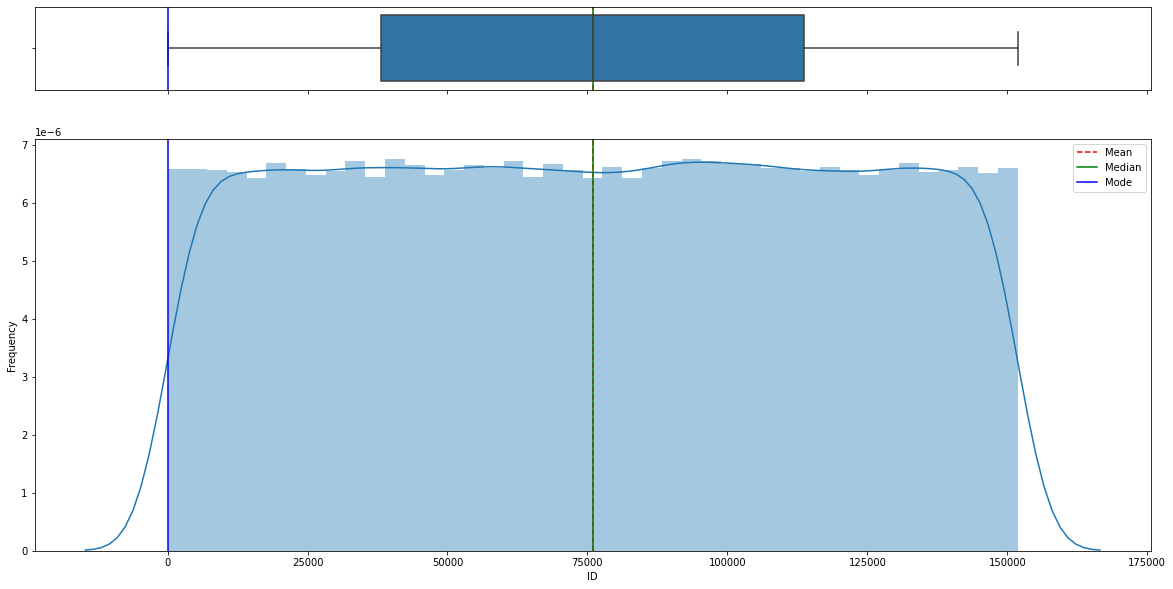

In [49]:
distributionOfNumericalColumns(traindataaftercorrtarget,"ID")

Variable ID has almost uniform distribution, and its values starts from 1 and then goes on till 151838, and from mode also it can be seen that rows contain all unique values
So its very likely that its a monotonically increasing column just to notify row numbers
This variable can be removed as it wont contribute to the prediction of class

 mean=-1523.1992765061825 median=2.0 mode=0    2
dtype: int64
min=-999999.0 	Q1 (25%) =2.0 	Q2 (50%) =2.0 
Q3 (75%) =2.0 	max=238.0  	(Q2-Q1)=0.0 
(Q3-Q2)=0.0 	(max-Q3)=236.0
IQR =0.0 Q1-1.5*IQR (lower whisker) =2.0 Q3+1.5*IQR (upper whisker ) =2.0
Using IQR
no of Rows containing var3 as Outliers 1855


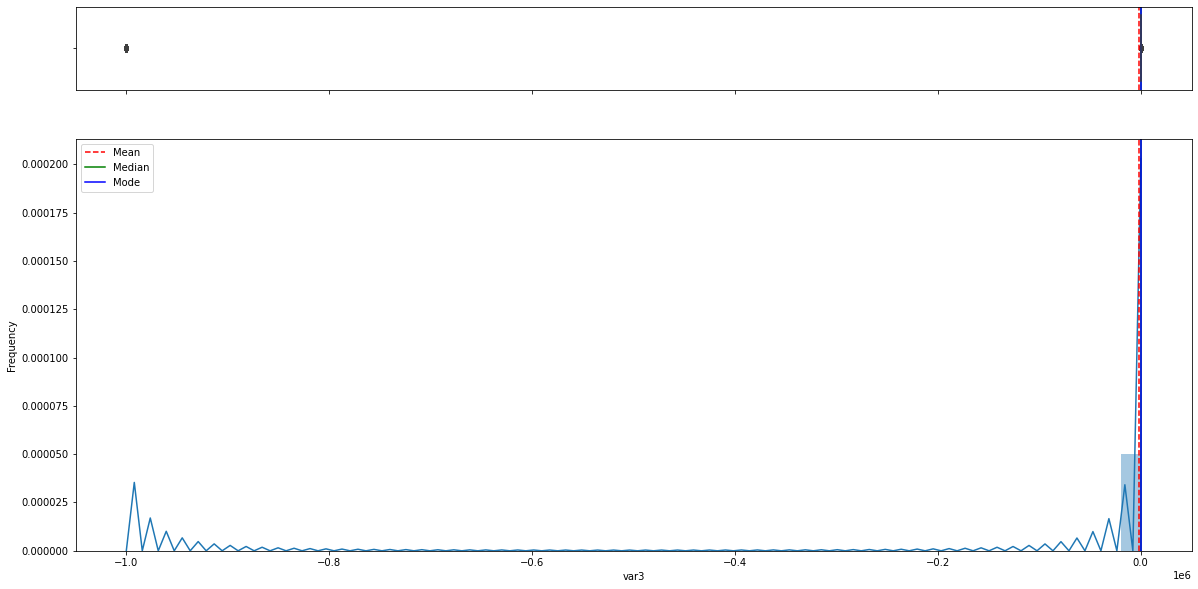

In [50]:
distributionOfNumericalColumns(traindataaftercorrtarget,"var3")

var3 value range is quite high min value is -999999.00000000, its most likely some default value where there is no data, as the other value ranges from 2 to 238
so unavailablity of data was replaced by the default value, This will create outlier issue
so in the later stages this value need to be cleaned up

 mean=33.21286503551697 median=28.0 mode=0    23
dtype: int64
min=5.0 	Q1 (25%) =23.0 	Q2 (50%) =28.0 
Q3 (75%) =40.0 	max=105.0  	(Q2-Q1)=5.0 
(Q3-Q2)=12.0 	(max-Q3)=65.0
IQR =17.0 Q1-1.5*IQR (lower whisker) =-2.5 Q3+1.5*IQR (upper whisker ) =65.5
Using IQR
no of Rows containing var15 as Outliers 2354


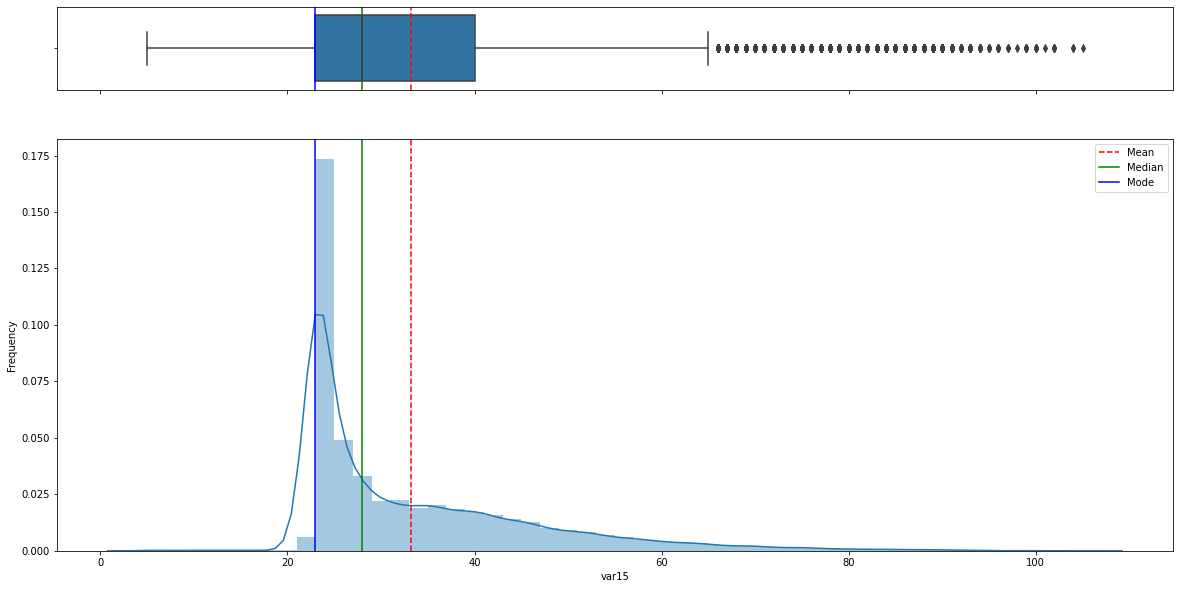

In [51]:
distributionOfNumericalColumns(traindataaftercorrtarget,"var15")

This column has a skewed distribution, most of the values appear at value 23.
so this is bound to be assymmetric distribution, and will result in potential outliers
But instead of considering the 1.5IQR range alone we should consider the full distribution that is upto 3IQR range, for determining if its actually outlier

 mean=72.36306708760878 median=0.0 mode=0    0.0
dtype: float64
min=0.0 	Q1 (25%) =0.0 	Q2 (50%) =0.0 
Q3 (75%) =0.0 	max=12888.03  	(Q2-Q1)=0.0 
(Q3-Q2)=0.0 	(max-Q3)=12888.03
IQR =0.0 Q1-1.5*IQR (lower whisker) =0.0 Q3+1.5*IQR (upper whisker ) =0.0
Using IQR
no of Rows containing imp_op_var39_comer_ult1 as Outliers 9945


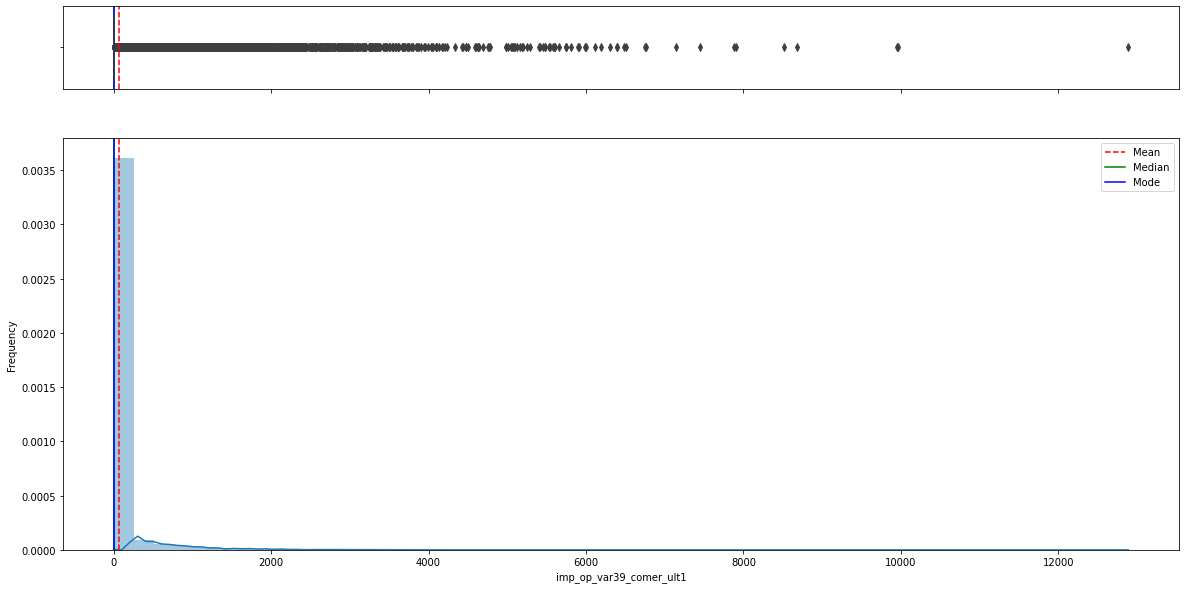

In [52]:
distributionOfNumericalColumns(traindataaftercorrtarget,"imp_op_var39_comer_ult1")

For this variable most of the values are zeroes and rest of the values appear only between q3 and max. so this will have outlier problem and column outliers need to be cleaned
But values seem to be decide presence and absence of some factor, if absent then 0, and if it is present then some positive value, so it will make sense if we can convert this variable to groups considering the ranges


 mean=3.5591298342541426 median=0.0 mode=0    0.0
dtype: float64
min=0.0 	Q1 (25%) =0.0 	Q2 (50%) =0.0 
Q3 (75%) =0.0 	max=8237.82  	(Q2-Q1)=0.0 
(Q3-Q2)=0.0 	(max-Q3)=8237.82
IQR =0.0 Q1-1.5*IQR (lower whisker) =0.0 Q3+1.5*IQR (upper whisker ) =0.0
Using IQR
no of Rows containing imp_op_var40_comer_ult1 as Outliers 295


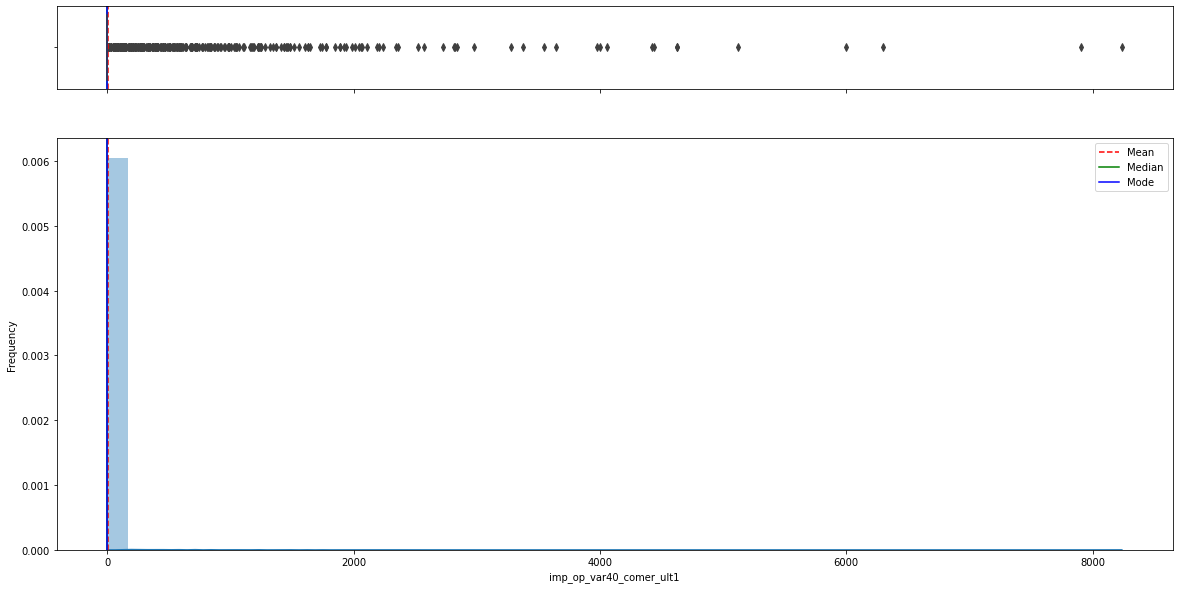

In [53]:
distributionOfNumericalColumns(traindataaftercorrtarget,"imp_op_var40_comer_ult1")

For this variable most of the values are zeroes and rest of the values appear only between q3 and max. so this will have outlier problem and column outliers need to be cleaned
But values seem to be decide presence and absence of some factor, if absent then 0, and if it is present then some positive value, so it will make sense if we can convert this variable to groups considering the ranges


 mean=0.41294632991318075 median=0.0 mode=0    0.0
dtype: float64
min=0.0 	Q1 (25%) =0.0 	Q2 (50%) =0.0 
Q3 (75%) =0.0 	max=6600.0  	(Q2-Q1)=0.0 
(Q3-Q2)=0.0 	(max-Q3)=6600.0
IQR =0.0 Q1-1.5*IQR (lower whisker) =0.0 Q3+1.5*IQR (upper whisker ) =0.0
Using IQR
no of Rows containing imp_op_var40_efect_ult1 as Outliers 38


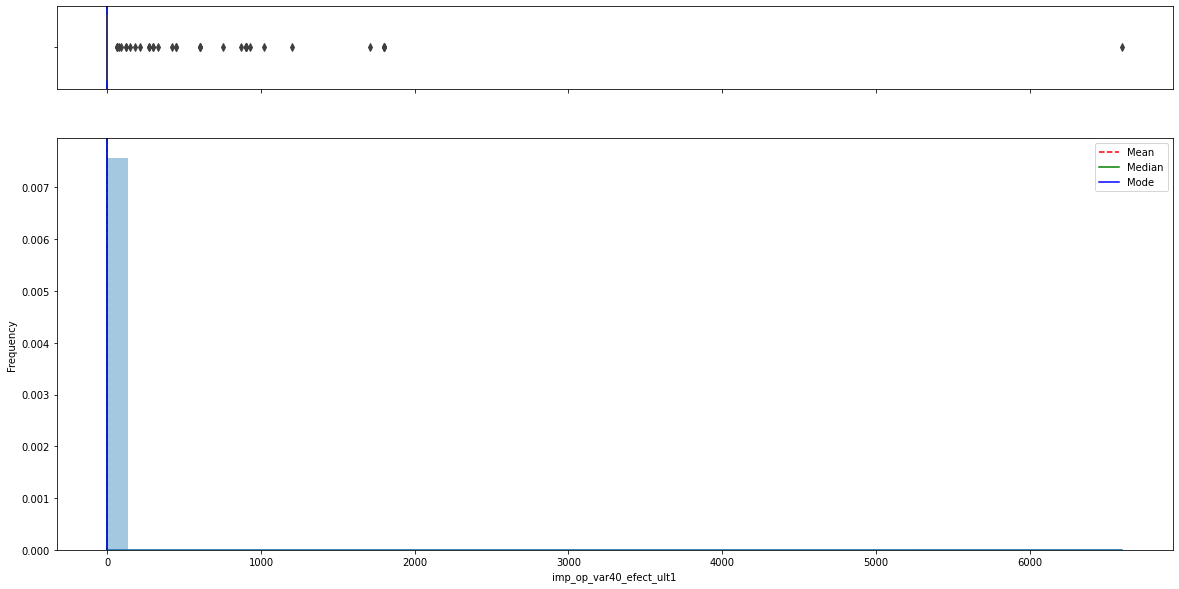

In [54]:
distributionOfNumericalColumns(traindataaftercorrtarget,"imp_op_var40_efect_ult1")

For this variable most of the values are zeroes and rest of the values appear only between q3 and max. so this will have outlier problem and column outliers need to be cleaned
But values seem to be decide presence and absence of some factor, if absent then 0, and if it is present then some positive value, so it will make sense if we can convert this variable to groups considering the ranges


 mean=68.20514048934491 median=0.0 mode=0    0.0
dtype: float64
min=0.0 	Q1 (25%) =0.0 	Q2 (50%) =0.0 
Q3 (75%) =0.0 	max=45990.0  	(Q2-Q1)=0.0 
(Q3-Q2)=0.0 	(max-Q3)=45990.0
IQR =0.0 Q1-1.5*IQR (lower whisker) =0.0 Q3+1.5*IQR (upper whisker ) =0.0
Using IQR
no of Rows containing imp_op_var41_efect_ult1 as Outliers 6684


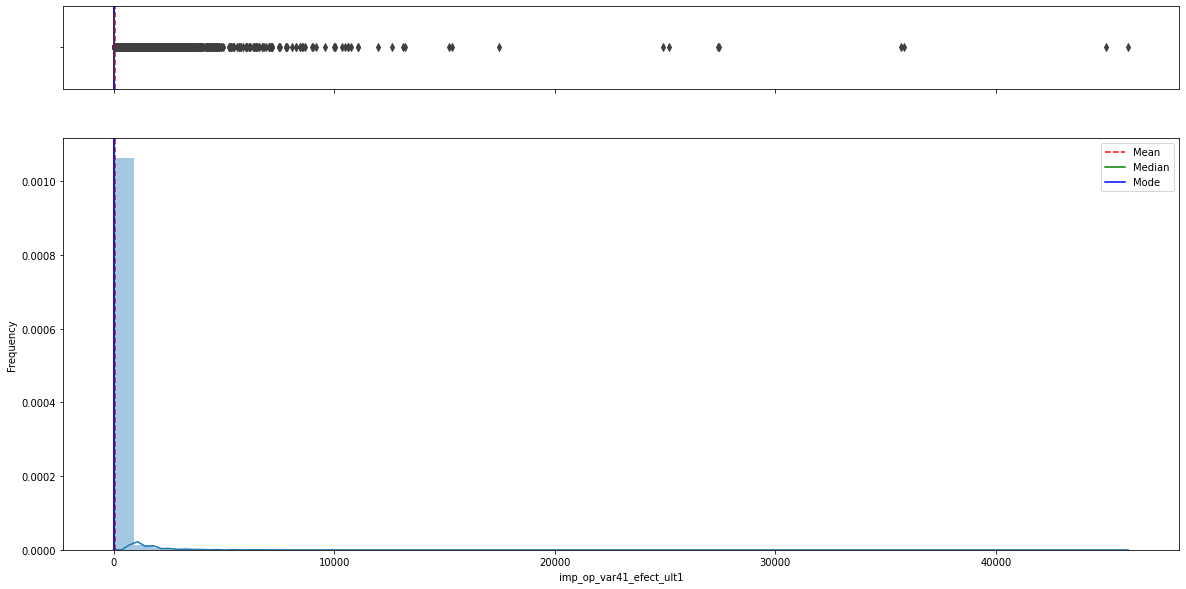

In [55]:
distributionOfNumericalColumns(traindataaftercorrtarget,"imp_op_var41_efect_ult1")

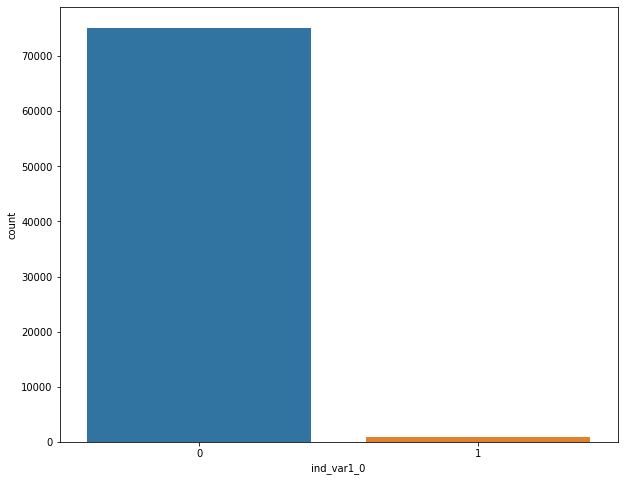

In [56]:
distributionOfNumericalColumns(traindataaftercorrtarget,"ind_var1_0")

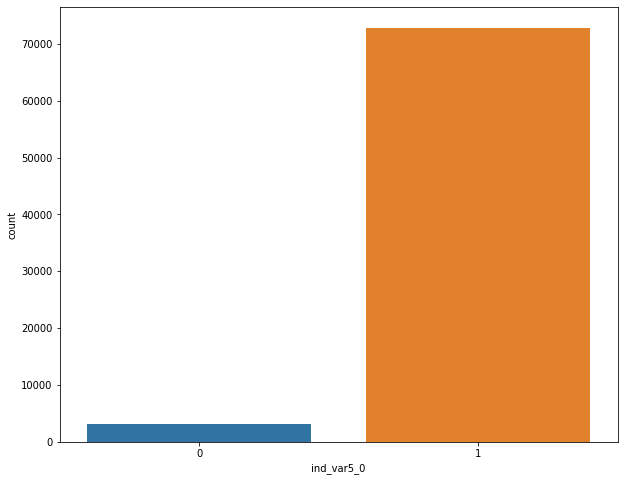

In [57]:
distributionOfNumericalColumns(traindataaftercorrtarget,"ind_var5_0")

In [58]:
traindataaftercorrtarget.head(5)

ID  var3  var15  ...  saldo_medio_var8_hace3          var38  TARGET
0   1     2     23  ...                     0.0   39205.170000       0
1   3     2     34  ...                     0.0   49278.030000       0
2   4     2     23  ...                     0.0   67333.770000       0
3   8     2     37  ...                     0.0   64007.970000       0
4  10     2     39  ...                     0.0  117310.979016       0

[5 rows x 59 columns]